In [1]:
import sys,os,re,csv,shutil
from os.path import join
import subprocess
import glob
from astropy.visualization import ZScaleInterval
from astropy.io import fits
from astropy.table import Table
from astropy.units import Quantity
import astropy.units as u
from astropy.io import ascii
from astropy.coordinates import SkyCoord

import numpy as np
import matplotlib.pyplot as plt

from astroquery.gaia import Gaia
from astroquery.mast import Observations
from astroquery.sdss import SDSS

from ccdproc import ImageFileCollection
from IPython.display import Image
#import stwcs

from drizzlepac import tweakreg
from drizzlepac import astrodrizzle
from IPython.display import Image

dalist=np.loadtxt("/home/yuanze/my_work/dalist.txt",delimiter='\n',dtype=str)

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


The following task in the stsci.skypac package can be run with TEAL:
                                    skymatch                                    
The following tasks in the drizzlepac package can be run with TEAL:
    astrodrizzle       config_testbed      imagefindpars           mapreg       
       photeq            pixreplace           pixtopix            pixtosky      
  refimagefindpars       resetbits          runastrodriz          skytopix      
     tweakback            tweakreg           updatenpol


In [11]:
##Use astroquery to download the data

#Observations.get_metadata("observations")


tarnum=1
print(dalist[tarnum])
tab=Observations.query_region(dalist[tarnum],radius=".02 deg")
obs_table=Observations.filter_products(tab,obs_collection='HST',instrument_name=['WFC3/UVIS','WFC3/IR','ACS/HRC','ACS/WFC','ACS/SBC'])
downdir='/home/yuanze/s{0}test'.format(tarnum)
print("Download Started")
#obs_table = Observations.query_criteria(obs_id='IEAG83010'.lower())
download_tab = Observations.download_products(obs_table['obsid'], mrp_only=False, 
                                              productSubGroupDescription=['FLC','FLT'],
                                             download_dir=downdir)


#ftab=Observations.filter_products(otab,obs_collection='HST',instrument_name=['WFC3/UVIS','WFC3/IR','ACS/HRC','ACS/WFC','ACS/SBC'],t_exptime>100)
#print(otab['obs_collection'=='HST'][0])
#obstab=Observations.filter_products(otab)
#Observations.list_missions()

13.3955833333	12.6933888889
Download Started


INFO:astropy:Found cached file /home/yuanze/s1test/mastDownload/HST/hst_12903_07_wfc3_ir_f105w_iby807cm/hst_12903_07_wfc3_ir_f105w_iby807cm_flt.fits with expected size 4354560.


INFO: Found cached file /home/yuanze/s1test/mastDownload/HST/hst_12903_07_wfc3_ir_f105w_iby807cm/hst_12903_07_wfc3_ir_f105w_iby807cm_flt.fits with expected size 4354560. [astroquery.query]


INFO:astropy:Found cached file /home/yuanze/s1test/mastDownload/HST/hst_12903_07_wfc3_ir_f105w_iby807cn/hst_12903_07_wfc3_ir_f105w_iby807cn_flt.fits with expected size 4340160.


INFO: Found cached file /home/yuanze/s1test/mastDownload/HST/hst_12903_07_wfc3_ir_f105w_iby807cn/hst_12903_07_wfc3_ir_f105w_iby807cn_flt.fits with expected size 4340160. [astroquery.query]


INFO:astropy:Found cached file /home/yuanze/s1test/mastDownload/HST/hst_12903_07_wfc3_ir_f105w_iby807co/hst_12903_07_wfc3_ir_f105w_iby807co_flt.fits with expected size 4351680.


INFO: Found cached file /home/yuanze/s1test/mastDownload/HST/hst_12903_07_wfc3_ir_f105w_iby807co/hst_12903_07_wfc3_ir_f105w_iby807co_flt.fits with expected size 4351680. [astroquery.query]


INFO:astropy:Found cached file /home/yuanze/s1test/mastDownload/HST/hst_12903_07_wfc3_ir_f105w_iby807cp/hst_12903_07_wfc3_ir_f105w_iby807cp_flt.fits with expected size 4351680.


INFO: Found cached file /home/yuanze/s1test/mastDownload/HST/hst_12903_07_wfc3_ir_f105w_iby807cp/hst_12903_07_wfc3_ir_f105w_iby807cp_flt.fits with expected size 4351680. [astroquery.query]


INFO:astropy:Found cached file /home/yuanze/s1test/mastDownload/HST/iby807cmq/iby807cmq_flt.fits with expected size 4343040.


INFO: Found cached file /home/yuanze/s1test/mastDownload/HST/iby807cmq/iby807cmq_flt.fits with expected size 4343040. [astroquery.query]


INFO:astropy:Found cached file /home/yuanze/s1test/mastDownload/HST/iby807cnq/iby807cnq_flt.fits with expected size 4328640.


INFO: Found cached file /home/yuanze/s1test/mastDownload/HST/iby807cnq/iby807cnq_flt.fits with expected size 4328640. [astroquery.query]


INFO:astropy:Found cached file /home/yuanze/s1test/mastDownload/HST/iby807coq/iby807coq_flt.fits with expected size 4340160.


INFO: Found cached file /home/yuanze/s1test/mastDownload/HST/iby807coq/iby807coq_flt.fits with expected size 4340160. [astroquery.query]


INFO:astropy:Found cached file /home/yuanze/s1test/mastDownload/HST/iby807cpq/iby807cpq_flt.fits with expected size 4340160.


INFO: Found cached file /home/yuanze/s1test/mastDownload/HST/iby807cpq/iby807cpq_flt.fits with expected size 4340160. [astroquery.query]


INFO:astropy:Found cached file /home/yuanze/s1test/mastDownload/HST/hst_12903_07_wfc3_uvis_f438w_iby807ch/hst_12903_07_wfc3_uvis_f438w_iby807ch_flt.fits with expected size 10802880.


INFO: Found cached file /home/yuanze/s1test/mastDownload/HST/hst_12903_07_wfc3_uvis_f438w_iby807ch/hst_12903_07_wfc3_uvis_f438w_iby807ch_flt.fits with expected size 10802880. [astroquery.query]


INFO:astropy:Found cached file /home/yuanze/s1test/mastDownload/HST/hst_12903_07_wfc3_uvis_f438w_iby807ci/hst_12903_07_wfc3_uvis_f438w_iby807ci_flt.fits with expected size 10802880.


INFO: Found cached file /home/yuanze/s1test/mastDownload/HST/hst_12903_07_wfc3_uvis_f438w_iby807ci/hst_12903_07_wfc3_uvis_f438w_iby807ci_flt.fits with expected size 10802880. [astroquery.query]


INFO:astropy:Found cached file /home/yuanze/s1test/mastDownload/HST/hst_12903_07_wfc3_uvis_f438w_iby807cj/hst_12903_07_wfc3_uvis_f438w_iby807cj_flt.fits with expected size 10854720.


INFO: Found cached file /home/yuanze/s1test/mastDownload/HST/hst_12903_07_wfc3_uvis_f438w_iby807cj/hst_12903_07_wfc3_uvis_f438w_iby807cj_flt.fits with expected size 10854720. [astroquery.query]


INFO:astropy:Found cached file /home/yuanze/s1test/mastDownload/HST/hst_12903_07_wfc3_uvis_f438w_iby807ck/hst_12903_07_wfc3_uvis_f438w_iby807ck_flt.fits with expected size 10802880.


INFO: Found cached file /home/yuanze/s1test/mastDownload/HST/hst_12903_07_wfc3_uvis_f438w_iby807ck/hst_12903_07_wfc3_uvis_f438w_iby807ck_flt.fits with expected size 10802880. [astroquery.query]


INFO:astropy:Found cached file /home/yuanze/s1test/mastDownload/HST/hst_12903_07_wfc3_uvis_f438w_iby807cl/hst_12903_07_wfc3_uvis_f438w_iby807cl_flt.fits with expected size 10802880.


INFO: Found cached file /home/yuanze/s1test/mastDownload/HST/hst_12903_07_wfc3_uvis_f438w_iby807cl/hst_12903_07_wfc3_uvis_f438w_iby807cl_flt.fits with expected size 10802880. [astroquery.query]


INFO:astropy:Found cached file /home/yuanze/s1test/mastDownload/HST/iby807chq/iby807chq_flt.fits with expected size 10802880.


INFO: Found cached file /home/yuanze/s1test/mastDownload/HST/iby807chq/iby807chq_flt.fits with expected size 10802880. [astroquery.query]


INFO:astropy:Found cached file /home/yuanze/s1test/mastDownload/HST/iby807ciq/iby807ciq_flt.fits with expected size 10802880.


INFO: Found cached file /home/yuanze/s1test/mastDownload/HST/iby807ciq/iby807ciq_flt.fits with expected size 10802880. [astroquery.query]


INFO:astropy:Found cached file /home/yuanze/s1test/mastDownload/HST/iby807cjq/iby807cjq_flt.fits with expected size 10854720.


INFO: Found cached file /home/yuanze/s1test/mastDownload/HST/iby807cjq/iby807cjq_flt.fits with expected size 10854720. [astroquery.query]


INFO:astropy:Found cached file /home/yuanze/s1test/mastDownload/HST/iby807ckq/iby807ckq_flt.fits with expected size 10802880.


INFO: Found cached file /home/yuanze/s1test/mastDownload/HST/iby807ckq/iby807ckq_flt.fits with expected size 10802880. [astroquery.query]


INFO:astropy:Found cached file /home/yuanze/s1test/mastDownload/HST/iby807clq/iby807clq_flt.fits with expected size 10802880.


INFO: Found cached file /home/yuanze/s1test/mastDownload/HST/iby807clq/iby807clq_flt.fits with expected size 10802880. [astroquery.query]


INFO:astropy:Found cached file /home/yuanze/s1test/mastDownload/HST/hst_12903_07_wfc3_uvis_f438w_iby807ch/hst_12903_07_wfc3_uvis_f438w_iby807ch_flt.fits with expected size 10802880.


INFO: Found cached file /home/yuanze/s1test/mastDownload/HST/hst_12903_07_wfc3_uvis_f438w_iby807ch/hst_12903_07_wfc3_uvis_f438w_iby807ch_flt.fits with expected size 10802880. [astroquery.query]


INFO:astropy:Found cached file /home/yuanze/s1test/mastDownload/HST/hst_12903_07_wfc3_uvis_f438w_iby807ci/hst_12903_07_wfc3_uvis_f438w_iby807ci_flt.fits with expected size 10802880.


INFO: Found cached file /home/yuanze/s1test/mastDownload/HST/hst_12903_07_wfc3_uvis_f438w_iby807ci/hst_12903_07_wfc3_uvis_f438w_iby807ci_flt.fits with expected size 10802880. [astroquery.query]


INFO:astropy:Found cached file /home/yuanze/s1test/mastDownload/HST/iby807chq/iby807chq_flt.fits with expected size 10802880.


INFO: Found cached file /home/yuanze/s1test/mastDownload/HST/iby807chq/iby807chq_flt.fits with expected size 10802880. [astroquery.query]


INFO:astropy:Found cached file /home/yuanze/s1test/mastDownload/HST/iby807ciq/iby807ciq_flt.fits with expected size 10802880.


INFO: Found cached file /home/yuanze/s1test/mastDownload/HST/iby807ciq/iby807ciq_flt.fits with expected size 10802880. [astroquery.query]


INFO:astropy:Found cached file /home/yuanze/s1test/mastDownload/HST/hst_12903_07_wfc3_uvis_f438w_iby807cj/hst_12903_07_wfc3_uvis_f438w_iby807cj_flt.fits with expected size 10854720.


INFO: Found cached file /home/yuanze/s1test/mastDownload/HST/hst_12903_07_wfc3_uvis_f438w_iby807cj/hst_12903_07_wfc3_uvis_f438w_iby807cj_flt.fits with expected size 10854720. [astroquery.query]


INFO:astropy:Found cached file /home/yuanze/s1test/mastDownload/HST/hst_12903_07_wfc3_uvis_f438w_iby807ck/hst_12903_07_wfc3_uvis_f438w_iby807ck_flt.fits with expected size 10802880.


INFO: Found cached file /home/yuanze/s1test/mastDownload/HST/hst_12903_07_wfc3_uvis_f438w_iby807ck/hst_12903_07_wfc3_uvis_f438w_iby807ck_flt.fits with expected size 10802880. [astroquery.query]


INFO:astropy:Found cached file /home/yuanze/s1test/mastDownload/HST/hst_12903_07_wfc3_uvis_f438w_iby807cl/hst_12903_07_wfc3_uvis_f438w_iby807cl_flt.fits with expected size 10802880.


INFO: Found cached file /home/yuanze/s1test/mastDownload/HST/hst_12903_07_wfc3_uvis_f438w_iby807cl/hst_12903_07_wfc3_uvis_f438w_iby807cl_flt.fits with expected size 10802880. [astroquery.query]


INFO:astropy:Found cached file /home/yuanze/s1test/mastDownload/HST/iby807cjq/iby807cjq_flt.fits with expected size 10854720.


INFO: Found cached file /home/yuanze/s1test/mastDownload/HST/iby807cjq/iby807cjq_flt.fits with expected size 10854720. [astroquery.query]


INFO:astropy:Found cached file /home/yuanze/s1test/mastDownload/HST/iby807ckq/iby807ckq_flt.fits with expected size 10802880.


INFO: Found cached file /home/yuanze/s1test/mastDownload/HST/iby807ckq/iby807ckq_flt.fits with expected size 10802880. [astroquery.query]


INFO:astropy:Found cached file /home/yuanze/s1test/mastDownload/HST/iby807clq/iby807clq_flt.fits with expected size 10802880.


INFO: Found cached file /home/yuanze/s1test/mastDownload/HST/iby807clq/iby807clq_flt.fits with expected size 10802880. [astroquery.query]


INFO:astropy:Found cached file /home/yuanze/s1test/mastDownload/HST/hst_12903_07_wfc3_ir_f105w_iby807cm/hst_12903_07_wfc3_ir_f105w_iby807cm_flt.fits with expected size 4354560.


INFO: Found cached file /home/yuanze/s1test/mastDownload/HST/hst_12903_07_wfc3_ir_f105w_iby807cm/hst_12903_07_wfc3_ir_f105w_iby807cm_flt.fits with expected size 4354560. [astroquery.query]


INFO:astropy:Found cached file /home/yuanze/s1test/mastDownload/HST/hst_12903_07_wfc3_ir_f105w_iby807cn/hst_12903_07_wfc3_ir_f105w_iby807cn_flt.fits with expected size 4340160.


INFO: Found cached file /home/yuanze/s1test/mastDownload/HST/hst_12903_07_wfc3_ir_f105w_iby807cn/hst_12903_07_wfc3_ir_f105w_iby807cn_flt.fits with expected size 4340160. [astroquery.query]


INFO:astropy:Found cached file /home/yuanze/s1test/mastDownload/HST/hst_12903_07_wfc3_ir_f105w_iby807co/hst_12903_07_wfc3_ir_f105w_iby807co_flt.fits with expected size 4351680.


INFO: Found cached file /home/yuanze/s1test/mastDownload/HST/hst_12903_07_wfc3_ir_f105w_iby807co/hst_12903_07_wfc3_ir_f105w_iby807co_flt.fits with expected size 4351680. [astroquery.query]


INFO:astropy:Found cached file /home/yuanze/s1test/mastDownload/HST/hst_12903_07_wfc3_ir_f105w_iby807cp/hst_12903_07_wfc3_ir_f105w_iby807cp_flt.fits with expected size 4351680.


INFO: Found cached file /home/yuanze/s1test/mastDownload/HST/hst_12903_07_wfc3_ir_f105w_iby807cp/hst_12903_07_wfc3_ir_f105w_iby807cp_flt.fits with expected size 4351680. [astroquery.query]


INFO:astropy:Found cached file /home/yuanze/s1test/mastDownload/HST/iby807cmq/iby807cmq_flt.fits with expected size 4343040.


INFO: Found cached file /home/yuanze/s1test/mastDownload/HST/iby807cmq/iby807cmq_flt.fits with expected size 4343040. [astroquery.query]


INFO:astropy:Found cached file /home/yuanze/s1test/mastDownload/HST/iby807cnq/iby807cnq_flt.fits with expected size 4328640.


INFO: Found cached file /home/yuanze/s1test/mastDownload/HST/iby807cnq/iby807cnq_flt.fits with expected size 4328640. [astroquery.query]


INFO:astropy:Found cached file /home/yuanze/s1test/mastDownload/HST/iby807coq/iby807coq_flt.fits with expected size 4340160.


INFO: Found cached file /home/yuanze/s1test/mastDownload/HST/iby807coq/iby807coq_flt.fits with expected size 4340160. [astroquery.query]


INFO:astropy:Found cached file /home/yuanze/s1test/mastDownload/HST/iby807cpq/iby807cpq_flt.fits with expected size 4340160.


INFO: Found cached file /home/yuanze/s1test/mastDownload/HST/iby807cpq/iby807cpq_flt.fits with expected size 4340160. [astroquery.query]


INFO:astropy:Found cached file /home/yuanze/s1test/mastDownload/HST/hst_12903_07_wfc3_ir_f105w_iby807cm/hst_12903_07_wfc3_ir_f105w_iby807cm_flt.fits with expected size 4354560.


INFO: Found cached file /home/yuanze/s1test/mastDownload/HST/hst_12903_07_wfc3_ir_f105w_iby807cm/hst_12903_07_wfc3_ir_f105w_iby807cm_flt.fits with expected size 4354560. [astroquery.query]


INFO:astropy:Found cached file /home/yuanze/s1test/mastDownload/HST/hst_12903_07_wfc3_ir_f105w_iby807cn/hst_12903_07_wfc3_ir_f105w_iby807cn_flt.fits with expected size 4340160.


INFO: Found cached file /home/yuanze/s1test/mastDownload/HST/hst_12903_07_wfc3_ir_f105w_iby807cn/hst_12903_07_wfc3_ir_f105w_iby807cn_flt.fits with expected size 4340160. [astroquery.query]


INFO:astropy:Found cached file /home/yuanze/s1test/mastDownload/HST/hst_12903_07_wfc3_ir_f105w_iby807co/hst_12903_07_wfc3_ir_f105w_iby807co_flt.fits with expected size 4351680.


INFO: Found cached file /home/yuanze/s1test/mastDownload/HST/hst_12903_07_wfc3_ir_f105w_iby807co/hst_12903_07_wfc3_ir_f105w_iby807co_flt.fits with expected size 4351680. [astroquery.query]


INFO:astropy:Found cached file /home/yuanze/s1test/mastDownload/HST/hst_12903_07_wfc3_ir_f105w_iby807cp/hst_12903_07_wfc3_ir_f105w_iby807cp_flt.fits with expected size 4351680.


INFO: Found cached file /home/yuanze/s1test/mastDownload/HST/hst_12903_07_wfc3_ir_f105w_iby807cp/hst_12903_07_wfc3_ir_f105w_iby807cp_flt.fits with expected size 4351680. [astroquery.query]


INFO:astropy:Found cached file /home/yuanze/s1test/mastDownload/HST/hst_12903_07_wfc3_ir_f105w_iby807cm/hst_12903_07_wfc3_ir_f105w_iby807cm_flt.fits with expected size 4354560.


INFO: Found cached file /home/yuanze/s1test/mastDownload/HST/hst_12903_07_wfc3_ir_f105w_iby807cm/hst_12903_07_wfc3_ir_f105w_iby807cm_flt.fits with expected size 4354560. [astroquery.query]


INFO:astropy:Found cached file /home/yuanze/s1test/mastDownload/HST/hst_12903_07_wfc3_ir_f105w_iby807cn/hst_12903_07_wfc3_ir_f105w_iby807cn_flt.fits with expected size 4340160.


INFO: Found cached file /home/yuanze/s1test/mastDownload/HST/hst_12903_07_wfc3_ir_f105w_iby807cn/hst_12903_07_wfc3_ir_f105w_iby807cn_flt.fits with expected size 4340160. [astroquery.query]


INFO:astropy:Found cached file /home/yuanze/s1test/mastDownload/HST/hst_12903_07_wfc3_ir_f105w_iby807co/hst_12903_07_wfc3_ir_f105w_iby807co_flt.fits with expected size 4351680.


INFO: Found cached file /home/yuanze/s1test/mastDownload/HST/hst_12903_07_wfc3_ir_f105w_iby807co/hst_12903_07_wfc3_ir_f105w_iby807co_flt.fits with expected size 4351680. [astroquery.query]


INFO:astropy:Found cached file /home/yuanze/s1test/mastDownload/HST/hst_12903_07_wfc3_ir_f105w_iby807cp/hst_12903_07_wfc3_ir_f105w_iby807cp_flt.fits with expected size 4351680.


INFO: Found cached file /home/yuanze/s1test/mastDownload/HST/hst_12903_07_wfc3_ir_f105w_iby807cp/hst_12903_07_wfc3_ir_f105w_iby807cp_flt.fits with expected size 4351680. [astroquery.query]


FileNotFoundError: [Errno 2] No such file or directory: '/home/yuanze/s1test/mastDownload/HST/hst_12903_07_wfc3_ir_f105w_iby807cm/hst_12903_07_wfc3_ir_f105w_iby807cm_flt.fits' -> '/home/yuanze/s1test/hst_12903_07_wfc3_ir_f105w_iby807cm_flt.fits'

In [12]:
for file in download_tab['Local Path']:
    try:
        os.rename(file,join(downdir,os.path.basename(file)))
    except:
        print("File not found!")
shutil.rmtree(join(downdir,'mastDownload'))

File not found!
File not found!
File not found!
File not found!
File not found!
File not found!
File not found!
File not found!
File not found!
File not found!
File not found!
File not found!
File not found!
File not found!
File not found!
File not found!
File not found!
File not found!
File not found!
File not found!
File not found!
File not found!
File not found!
File not found!
File not found!
File not found!
File not found!
File not found!
File not found!
File not found!
File not found!
File not found!
File not found!
File not found!
File not found!
File not found!
File not found!
File not found!
File not found!
File not found!
File not found!
File not found!
File not found!
File not found!
File not found!
File not found!
File not found!
File not found!
File not found!
File not found!
File not found!
File not found!


In [4]:
down_ftab=Observations.download_products(ftab['obsid'],productSubGroupDescription=['FLC','FLT'])

INFO: Found cached file ./mastDownload/HST/hst_16241_83_wfc3_uvis_f225w_ieag83z6/hst_16241_83_wfc3_uvis_f225w_ieag83z6_flc.fits with expected size 2862720. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/hst_16241_83_wfc3_uvis_f225w_ieag83z7/hst_16241_83_wfc3_uvis_f225w_ieag83z7_flc.fits with expected size 168439680. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/hst_16241_83_wfc3_uvis_f225w_ieag83za/hst_16241_83_wfc3_uvis_f225w_ieag83za_flc.fits with expected size 168439680. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/hst_16241_83_wfc3_uvis_f225w_ieag83zf/hst_16241_83_wfc3_uvis_f225w_ieag83zf_flc.fits with expected size 168439680. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/ieag83z6q/ieag83z6q_flc.fits with expected size 2862720. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/ieag83z6q/ieag83z6q_flt.fits with expected size 2862720. [astroquery.query]
INFO: Found cached file ./mastDownload/HST/ieag83z7q/iea

In [16]:
downdir='/home/yuanze/s{0}test'.format(tarnum)
for file in download_tab['Local Path']:
    os.rename(file,join(downdir,os.path.basename(file)))
    

In [6]:
os.environ['CRDS_SERVER_URL'] = 'https://hst-crds.stsci.edu'
os.environ['CRDS_PATH'] = os.path.abspath(join('/home/yuanze/hstdata/s1', 'reference_files'))

In [9]:
targNum=1
datapath='/home/yuanze/hstdata/s{0}'.format(targNum)
#psfpath='/Users/ding/Desktop/AGN/HSTpsf'
flist=os.listdir(datapath)
fltlist=[flist[i] for i in range(len(flist)) if re.findall(".*flt.fits",flist[i]) != []]
os.chdir(datapath)
subprocess.check_output('crds bestrefs --files {0} --sync-references=1 --update-bestrefs'.format(join(datapath,fltlist[0])), shell=True, stderr=subprocess.DEVNULL)



CalledProcessError: Command 'crds bestrefs --files /home/yuanze/hstdata/s1/iby807cnq_flt.fits --sync-references=1 --update-bestrefs' returned non-zero exit status 127.

In [15]:
WFC3_IR=('F105W','F110W','F125W','F814W')
WFC3_UVIS=('F438W','F475W','F547M','F555W','F606W')
subband={
    "I":WFC3_IR,
    "B":WFC3_UVIS
}

pixsize={
    "B":0.04,
    "I":0.13
}
psfpixsize={
    "B":0.03,
    "I":0.06
}

##-------------------Source definition---------------------##
targname='NGC 5548'
targNum="6"

##-------------------Source properties---------------------##
ra=214.498058
dec=25.13679
z = 0.017
#ebv = 0.0550
#Av=0.1705
"""
cosmo = FlatLambdaCDM(H0=67.8 * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.308)
d=cosmo.luminosity_distance(z)
dc=d.to(u.cm)
dis=dc.value
C_unit=1./(4*np.pi*dis**2)
cutsize = 15. ##cut regime: a 30*30 arcsec box
spec_aperturesize = 2.
"""

##-------------------Source data file----------------------##
datapath='/home/yuanze/hstdata/s{0}'.format(targNum)
#datapath='/home/yuanze/s{0}test'.format(targNum)
#psfpath='/Users/ding/Desktop/AGN/HSTpsf'
flist=os.listdir(datapath)
psfpath="/home/yuanze/HSTpsf"
FLTlist=[flist[i] for i in range(len(flist)) if re.findall(".*flt.fits",flist[i])  != []]
FLClist=[flist[i] for i in range(len(flist)) if re.findall(".*flc.fits",flist[i])  != []]
collect = ImageFileCollection(datapath,
                              keywords=["asn_id", "detector", "filter", "exptime", "postarg1", "postarg2"],
                              glob_include="*flc.fits", ext=0)
out_table = collect.summary
print(out_table)
print(FLClist)

       file          asn_id  detector filter exptime  postarg1  postarg2
------------------ --------- -------- ------ ------- --------- ---------
ib5e07zmq_flc.fits IB5E07010     UVIS  F547M    10.0 -0.148078 -1.994511
ib5e07znq_flc.fits IB5E07010     UVIS  F547M   100.0 -0.148078 -1.994511
ib5e07zoq_flc.fits IB5E07010     UVIS  F547M  1020.0 -0.148078 -1.994511
ib5e07zqq_flc.fits IB5E07010     UVIS  F547M    10.0  0.148078  1.994511
ib5e07zrq_flc.fits IB5E07010     UVIS  F547M  1020.0  0.148078  1.994511
ib5e07ztq_flc.fits IB5E07010     UVIS  F547M   100.0  0.148078  1.994511
ibly04fpq_flc.fits IBLY04010     UVIS FQ508N   289.0       0.0       0.0
ibly04fqq_flc.fits IBLY04010     UVIS FQ508N   289.0       0.0       0.0
ibly04frq_flc.fits IBLY04020     UVIS  F665N    10.0       0.0       0.0
ibly04fsq_flc.fits IBLY04020     UVIS  F665N   226.0       0.0       0.0
ibly04ftq_flc.fits IBLY04020     UVIS  F665N   226.0       0.0       0.0
ibly04fvq_flc.fits      NONE     UVIS  F621M   206.

In [7]:
#UVISlist=out_table[out_table['detector']=='UVIS']['file']
UVISlist=FLClist.copy()
IRlist=out_table[out_table['detector']=='IR']['file']
HRClist=out_table[out_table['detector']=='HRC']['file']
#print(IRlist)

In [46]:
np.savetxt(join(datapath,"WFC3_UVIS.lis"),UVISlist.pformat(show_name=False),fmt='%s')
np.savetxt(join(datapath,"WFC3_IR.lis"),IRlist.pformat(show_name=False),fmt='%s')

In [8]:
fltfilelist={
    'WFC3_IR':IRlist.pformat(show_name=False),
    'WFC3_UVIS':UVISlist,
    'ACS_HRC':HRClist.pformat(show_name=False)
}



# Define the input FLT/C file list

In [9]:
telescope1='WFC3_IR'
telescope2='WFC3_UVIS'
telescope3='ACS_HRC'
conv={
    'WFC3_IR':2.5,
    'WFC3_UVIS':3.5
}
allfile=fltfilelist[telescope1].copy()
allfile[len(allfile):len(allfile)]=fltfilelist[telescope2].copy()
inputlist=[join(datapath,file) for file in fltfilelist[telescope2]]

#print(allfile)
extinputlist=[join(datapath,file) for file in allfile]


# Catalog Alignment: Use SDSS/Gaia Catalogs to align the flatfileded data

In [243]:
RA=dalist[tarnum].split("\t")[0]
Dec=dalist[tarnum].split("\t")[1]
coord = SkyCoord(ra=RA, dec=Dec, unit=(u.deg, u.deg))
radius = Quantity(15., u.arcsec)
#Get the object list
sdss_query = SDSS.query_region(coord, radius=radius, spectro=False, fields=['ra', 'dec', 'g'])
sdss_query.write(join(datapath,'sdss.cat'),overwrite=True, format='ascii.commented_header')

In [244]:
gaia_query = Gaia.query_object_async(coordinate=coord, radius=radius)
reduced_query = gaia_query['ra', 'dec', 'phot_g_mean_mag']
reduced_query.write(join(datapath,'gaia.cat'),overwrite=True, format='ascii.commented_header')


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:drizzlepac.util:Setting up logfile :  tweakreg.log


Setting up logfile :  tweakreg.log


INFO:drizzlepac.tweakreg:TweakReg Version 1.4.7(18-April-2018) started at: 15:44:14.946 (22/07/2022) 


TweakReg Version 1.4.7(18-April-2018) started at: 15:44:14.946 (22/07/2022) 


INFO:drizzlepac.tweakreg:


INFO:drizzlepac.util:Version Information


Version Information


INFO:drizzlepac.util:--------------------


--------------------


INFO:drizzlepac.util:Python Version [GCC 7.5.0]


Python Version [GCC 7.5.0]


INFO:drizzlepac.util:3.7.13 (default, Mar 29 2022, 02:18:16) 


3.7.13 (default, Mar 29 2022, 02:18:16) 


INFO:drizzlepac.util:numpy Version -> 1.21.5 


numpy Version -> 1.21.5 


INFO:drizzlepac.util:astropy Version -> 4.3.1 


astropy Version -> 4.3.1 


INFO:drizzlepac.util:stwcs Version -> 1.6.1 


stwcs Version -> 1.6.1 


INFO:drizzlepac.tweakreg:
INFO:drizzlepac.tweakreg:USER INPUT PARAMETERS common to all Processing Steps:
INFO:drizzlepac.tweakreg:	clean :	False
INFO:drizzlepac.tweakreg:	enforce_user_order :	True
INFO:drizzlepac.tweakreg:	exclusions :	
INFO:drizzlepac.tweakreg:	expand_refcat :	False
INFO:drizzlepac.tweakreg:	input :	['/home/yuanze/hstdata/s1/iby807cmq_flt.fits', '/home/yuanze/hstdata/s1/iby807cnq_flt.fits', '/home/yuanze/hstdata/s1/iby807coq_flt.fits', '/home/yuanze/hstdata/s1/iby807cpq_flt.fits']
INFO:drizzlepac.tweakreg:	interactive :	False
INFO:drizzlepac.tweakreg:	refimage :	
INFO:drizzlepac.tweakreg:	runfile :	tweakreg.log
INFO:drizzlepac.tweakreg:	updatewcs :	False
INFO:drizzlepac.tweakreg:	verbose :	False
INFO:drizzlepac.tweakreg:	writecat :	True
INFO:drizzlepac.tweakreg:


INFO:drizzlepac.tweakreg:Finding shifts for: 


Finding shifts for: 


INFO:drizzlepac.tweakreg:    /home/yuanze/hstdata/s1/iby807cmq_flt.fits


    /home/yuanze/hstdata/s1/iby807cmq_flt.fits


INFO:drizzlepac.tweakreg:    /home/yuanze/hstdata/s1/iby807cnq_flt.fits


    /home/yuanze/hstdata/s1/iby807cnq_flt.fits


INFO:drizzlepac.tweakreg:    /home/yuanze/hstdata/s1/iby807coq_flt.fits


    /home/yuanze/hstdata/s1/iby807coq_flt.fits


INFO:drizzlepac.tweakreg:    /home/yuanze/hstdata/s1/iby807cpq_flt.fits


    /home/yuanze/hstdata/s1/iby807cpq_flt.fits


INFO:drizzlepac.tweakreg:


INFO:drizzlepac.tweakreg:USER INPUT PARAMETERS for finding sources for each input image:
INFO:drizzlepac.tweakreg:	clean :	False
INFO:drizzlepac.tweakreg:	computesig :	True
INFO:drizzlepac.tweakreg:	conv_width :	2.5
INFO:drizzlepac.tweakreg:	dqbit :	0
INFO:drizzlepac.tweakreg:	dqbits :	
INFO:drizzlepac.tweakreg:	enforce_user_order :	True
INFO:drizzlepac.tweakreg:	expand_refcat :	False
INFO:drizzlepac.tweakreg:	fluxmax :	None
INFO:drizzlepac.tweakreg:	fluxmin :	None
INFO:drizzlepac.tweakreg:	input :	['/home/yuanze/hstdata/s1/iby807cmq_flt.fits', '/home/yuanze/hstdata/s1/iby807cnq_flt.fits', '/home/yuanze/hstdata/s1/iby807coq_flt.fits', '/home/yuanze/hstdata/s1/iby807cpq_flt.fits']
INFO:drizzlepac.tweakreg:	interactive :	False
INFO:drizzlepac.tweakreg:	nsigma :	1.5
INFO:drizzlepac.tweakreg:	peakmax :	None
INFO:drizzlepac.tweakreg:	peakmin :	None
INFO:drizzlepac.tweakreg:	ratio :	1.0
INFO:drizzlepac.tweakreg:	refimage :	
INFO:drizzlepac.tweakreg:	roundhi :	1.0
INFO:drizzlepac.tweakreg:	ro

===  Source finding for image '/home/yuanze/hstdata/s1/iby807cmq_flt.fits':


INFO:drizzlepac.catalogs:  #  Source finding for '/home/yuanze/hstdata/s1/iby807cmq_flt.fits', EXT=('SCI', 1) started at: 15:44:15.200 (22/07/2022)


  #  Source finding for '/home/yuanze/hstdata/s1/iby807cmq_flt.fits', EXT=('SCI', 1) started at: 15:44:15.200 (22/07/2022)


INFO:drizzlepac.catalogs:   Finding sources using sky sigma = 1.182600
INFO:drizzlepac.catalogs:###Source finding finished at: 15:44:15.215 (22/07/2022)
INFO:drizzlepac.catalogs:     Found 4 objects.


     Found 4 objects.


INFO:drizzlepac.imgclasses:===  FINAL number of objects in image '/home/yuanze/hstdata/s1/iby807cmq_flt.fits': 4


===  FINAL number of objects in image '/home/yuanze/hstdata/s1/iby807cmq_flt.fits': 4


INFO:drizzlepac.imgclasses:


INFO:drizzlepac.imgclasses:===  Source finding for image '/home/yuanze/hstdata/s1/iby807cnq_flt.fits':


===  Source finding for image '/home/yuanze/hstdata/s1/iby807cnq_flt.fits':


INFO:drizzlepac.catalogs:  #  Source finding for '/home/yuanze/hstdata/s1/iby807cnq_flt.fits', EXT=('SCI', 1) started at: 15:44:15.318 (22/07/2022)


  #  Source finding for '/home/yuanze/hstdata/s1/iby807cnq_flt.fits', EXT=('SCI', 1) started at: 15:44:15.318 (22/07/2022)


INFO:drizzlepac.catalogs:   Finding sources using sky sigma = 1.348211
INFO:drizzlepac.catalogs:###Source finding finished at: 15:44:15.333 (22/07/2022)
INFO:drizzlepac.catalogs:     Found 3 objects.


     Found 3 objects.


INFO:drizzlepac.imgclasses:===  FINAL number of objects in image '/home/yuanze/hstdata/s1/iby807cnq_flt.fits': 3


===  FINAL number of objects in image '/home/yuanze/hstdata/s1/iby807cnq_flt.fits': 3


INFO:drizzlepac.imgclasses:


INFO:drizzlepac.imgclasses:===  Source finding for image '/home/yuanze/hstdata/s1/iby807coq_flt.fits':


===  Source finding for image '/home/yuanze/hstdata/s1/iby807coq_flt.fits':


INFO:drizzlepac.catalogs:  #  Source finding for '/home/yuanze/hstdata/s1/iby807coq_flt.fits', EXT=('SCI', 1) started at: 15:44:15.431 (22/07/2022)


  #  Source finding for '/home/yuanze/hstdata/s1/iby807coq_flt.fits', EXT=('SCI', 1) started at: 15:44:15.431 (22/07/2022)


INFO:drizzlepac.catalogs:   Finding sources using sky sigma = 1.387190
INFO:drizzlepac.catalogs:###Source finding finished at: 15:44:15.446 (22/07/2022)
INFO:drizzlepac.catalogs:     Found 3 objects.


     Found 3 objects.


INFO:drizzlepac.imgclasses:===  FINAL number of objects in image '/home/yuanze/hstdata/s1/iby807coq_flt.fits': 3


===  FINAL number of objects in image '/home/yuanze/hstdata/s1/iby807coq_flt.fits': 3


INFO:drizzlepac.imgclasses:


INFO:drizzlepac.imgclasses:===  Source finding for image '/home/yuanze/hstdata/s1/iby807cpq_flt.fits':


===  Source finding for image '/home/yuanze/hstdata/s1/iby807cpq_flt.fits':


INFO:drizzlepac.catalogs:  #  Source finding for '/home/yuanze/hstdata/s1/iby807cpq_flt.fits', EXT=('SCI', 1) started at: 15:44:15.544 (22/07/2022)


  #  Source finding for '/home/yuanze/hstdata/s1/iby807cpq_flt.fits', EXT=('SCI', 1) started at: 15:44:15.544 (22/07/2022)


INFO:drizzlepac.catalogs:   Finding sources using sky sigma = 1.620377
INFO:drizzlepac.catalogs:###Source finding finished at: 15:44:15.558 (22/07/2022)
INFO:drizzlepac.catalogs:     Found 4 objects.


     Found 4 objects.


INFO:drizzlepac.imgclasses:===  FINAL number of objects in image '/home/yuanze/hstdata/s1/iby807cpq_flt.fits': 4


===  FINAL number of objects in image '/home/yuanze/hstdata/s1/iby807cpq_flt.fits': 4


INFO:drizzlepac.imgclasses:


INFO:drizzlepac.imgclasses:Converting RA/Dec positions of reference sources from "/home/yuanze/hstdata/s1/iby807cmq_flt.fits" to X,Y positions in reference WCS...
INFO:drizzlepac.tweakreg:


INFO:drizzlepac.tweakreg:===============================================================


INFO:drizzlepac.tweakreg:Performing alignment in the projection plane defined by the WCS


Performing alignment in the projection plane defined by the WCS


INFO:drizzlepac.tweakreg:derived from '/home/yuanze/hstdata/s1/iby807cmq_flt.fits'


derived from '/home/yuanze/hstdata/s1/iby807cmq_flt.fits'


INFO:drizzlepac.tweakreg:===============================================================


INFO:drizzlepac.tweakreg:


INFO:drizzlepac.tweakreg:USER INPUT PARAMETERS for matching sources:
INFO:drizzlepac.tweakreg:	minobj :	2
INFO:drizzlepac.tweakreg:	residplot :	both
INFO:drizzlepac.tweakreg:	searchrad :	2.0
INFO:drizzlepac.tweakreg:	searchunits :	arcseconds
INFO:drizzlepac.tweakreg:	see2dplot :	False
INFO:drizzlepac.tweakreg:	separation :	0.5
INFO:drizzlepac.tweakreg:	tolerance :	1.0
INFO:drizzlepac.tweakreg:	use2dhist :	True
INFO:drizzlepac.tweakreg:	xoffset :	0.0
INFO:drizzlepac.tweakreg:	yoffset :	0.0
INFO:drizzlepac.tweakreg:
INFO:drizzlepac.tweakreg:USER INPUT PARAMETERS for fitting source lists:
INFO:drizzlepac.tweakreg:	fitgeometry :	shift
INFO:drizzlepac.tweakreg:	labelsize :	8
INFO:drizzlepac.tweakreg:	minobj :	2
INFO:drizzlepac.tweakreg:	nclip :	3
INFO:drizzlepac.tweakreg:	residplot :	both
INFO:drizzlepac.tweakreg:	sigma :	3.0
INFO:drizzlepac.tweakreg:	ylimit :	None
INFO:drizzlepac.tweakreg:
INFO:drizzlepac.tweakreg:USER INPUT PARAMETERS for creating a shiftfile:
INFO:drizzlepac.tweakreg:	ou

INFO:drizzlepac.tweakreg:====================


INFO:drizzlepac.tweakreg:Performing fit for: /home/yuanze/hstdata/s1/iby807cnq_flt.fits


Performing fit for: /home/yuanze/hstdata/s1/iby807cnq_flt.fits


INFO:drizzlepac.tweakreg:


INFO:drizzlepac.imgclasses:Matching sources from '/home/yuanze/hstdata/s1/iby807cnq_flt.fits' with sources from reference image '/home/yuanze/hstdata/s1/iby807cmq_flt.fits'


Matching sources from '/home/yuanze/hstdata/s1/iby807cnq_flt.fits' with sources from reference image '/home/yuanze/hstdata/s1/iby807cmq_flt.fits'


INFO:drizzlepac.imgclasses:Computing initial guess for X and Y shifts...


Computing initial guess for X and Y shifts...


INFO:drizzlepac.imgclasses:Found initial X and Y shifts of 0.4055, 0.4055 based on a single non-zero bin and 3 matches


Found initial X and Y shifts of 0.4055, 0.4055 based on a single non-zero bin and 3 matches


INFO:drizzlepac.imgclasses:Found 3 matches for /home/yuanze/hstdata/s1/iby807cnq_flt.fits...


Found 3 matches for /home/yuanze/hstdata/s1/iby807cnq_flt.fits...


INFO:drizzlepac.linearfit:Performing "shift" fit
INFO:drizzlepac.linearfit:Performing "shift" fit
INFO:drizzlepac.linearfit:Performing "shift" fit
INFO:drizzlepac.linearfit:Performing "shift" fit
INFO:drizzlepac.imgclasses:Computed  shift  fit for  /home/yuanze/hstdata/s1/iby807cnq_flt.fits : 


Computed  shift  fit for  /home/yuanze/hstdata/s1/iby807cnq_flt.fits : 


INFO:drizzlepac.imgclasses:XSH: 0.0000  YSH: 0.0000


XSH: 0.0000  YSH: 0.0000


INFO:drizzlepac.imgclasses:FIT XRMS: 0.024      FIT YRMS: 0.025  


FIT XRMS: 0.024      FIT YRMS: 0.025  


INFO:drizzlepac.imgclasses:FIT RMSE: 0.035      FIT MAE: 0.032  


FIT RMSE: 0.035      FIT MAE: 0.032  


INFO:drizzlepac.imgclasses:


INFO:drizzlepac.imgclasses:RMS_RA: 1.3e-06 (deg)   RMS_DEC: 1.3e-07 (deg)


RMS_RA: 1.3e-06 (deg)   RMS_DEC: 1.3e-07 (deg)


INFO:drizzlepac.imgclasses:


INFO:drizzlepac.imgclasses:Final solution based on  3  objects.


Final solution based on  3  objects.


INFO:drizzlepac.imgclasses:Creating catalog for the fit: iby807cnq_flt_catalog_fit.match
INFO:drizzlepac.tweakutils:wrote XY data to:  iby807cnq_flt_catalog_fit.match


wrote XY data to:  iby807cnq_flt_catalog_fit.match


INFO:drizzlepac.tweakutils:Total # points: 3


Total # points: 3


INFO:drizzlepac.tweakutils:# of points after clipping: 3


# of points after clipping: 3


INFO:drizzlepac.tweakutils:Total # points: 3


Total # points: 3


INFO:drizzlepac.tweakutils:# of points after clipping: 3


# of points after clipping: 3


INFO:drizzlepac.updatehdr:


INFO:drizzlepac.updatehdr:....Updating header for '/home/yuanze/hstdata/s1/iby807cnq_flt.fits' ...


....Updating header for '/home/yuanze/hstdata/s1/iby807cnq_flt.fits' ...


INFO:drizzlepac.updatehdr:


INFO:drizzlepac.updatehdr:


INFO:drizzlepac.updatehdr:Processing /home/yuanze/hstdata/s1/iby807cnq_flt.fits['SCI',1]


Processing /home/yuanze/hstdata/s1/iby807cnq_flt.fits['SCI',1]


INFO:drizzlepac.updatehdr:


INFO:drizzlepac.updatehdr:Updating header for /home/yuanze/hstdata/s1/iby807cnq_flt.fits[1]


Updating header for /home/yuanze/hstdata/s1/iby807cnq_flt.fits[1]


INFO:drizzlepac.updatehdr:    with WCS of
INFO:stwcs.wcsutil.hstwcs:WCS Keywords


WCS Keywords


INFO:stwcs.wcsutil.hstwcs:


INFO:stwcs.wcsutil.hstwcs:CD_11  CD_12: -2.236107979287015e-05 -2.7124096205695035e-05


CD_11  CD_12: -2.236107979287015e-05 -2.7124096205695035e-05


INFO:stwcs.wcsutil.hstwcs:CD_21  CD_22: -3.0268417740654594e-05 1.9878284648610762e-05


CD_21  CD_22: -3.0268417740654594e-05 1.9878284648610762e-05


INFO:stwcs.wcsutil.hstwcs:CRVAL    : 13.395837289695258 12.692929150709379


CRVAL    : 13.395837289695258 12.692929150709379


INFO:stwcs.wcsutil.hstwcs:CRPIX    : 266.0 266.0


CRPIX    : 266.0 266.0


INFO:stwcs.wcsutil.hstwcs:NAXIS    : 512 512


NAXIS    : 512 512


INFO:stwcs.wcsutil.hstwcs:Plate Scale : 0.13547651908317526


Plate Scale : 0.13547651908317526


INFO:stwcs.wcsutil.hstwcs:ORIENTAT : -53.76363785473951


ORIENTAT : -53.76363785473951


INFO:drizzlepac.updatehdr:WCSNAME  :  TWEAK


WCSNAME  :  TWEAK


INFO:drizzlepac.imgclasses:Updating WCSCORR table with new WCS solution "TWEAK"
INFO:drizzlepac.tweakreg:


INFO:drizzlepac.tweakreg:====================


INFO:drizzlepac.tweakreg:Performing fit for: /home/yuanze/hstdata/s1/iby807coq_flt.fits


Performing fit for: /home/yuanze/hstdata/s1/iby807coq_flt.fits


INFO:drizzlepac.tweakreg:


INFO:drizzlepac.imgclasses:Matching sources from '/home/yuanze/hstdata/s1/iby807coq_flt.fits' with sources from reference image '/home/yuanze/hstdata/s1/iby807cmq_flt.fits'


Matching sources from '/home/yuanze/hstdata/s1/iby807coq_flt.fits' with sources from reference image '/home/yuanze/hstdata/s1/iby807cmq_flt.fits'


INFO:drizzlepac.imgclasses:Computing initial guess for X and Y shifts...


Computing initial guess for X and Y shifts...


INFO:drizzlepac.imgclasses:Found initial X and Y shifts of 0.4055, 0.4055 based on a single non-zero bin and 3 matches


Found initial X and Y shifts of 0.4055, 0.4055 based on a single non-zero bin and 3 matches


INFO:drizzlepac.imgclasses:Found 3 matches for /home/yuanze/hstdata/s1/iby807coq_flt.fits...


Found 3 matches for /home/yuanze/hstdata/s1/iby807coq_flt.fits...


INFO:drizzlepac.linearfit:Performing "shift" fit
INFO:drizzlepac.linearfit:Performing "shift" fit
INFO:drizzlepac.linearfit:Performing "shift" fit
INFO:drizzlepac.linearfit:Performing "shift" fit
INFO:drizzlepac.imgclasses:Computed  shift  fit for  /home/yuanze/hstdata/s1/iby807coq_flt.fits : 


Computed  shift  fit for  /home/yuanze/hstdata/s1/iby807coq_flt.fits : 


INFO:drizzlepac.imgclasses:XSH: -0.0000  YSH: -0.0000


XSH: -0.0000  YSH: -0.0000


INFO:drizzlepac.imgclasses:FIT XRMS: 0.03       FIT YRMS: 0.0053 


FIT XRMS: 0.03       FIT YRMS: 0.0053 


INFO:drizzlepac.imgclasses:FIT RMSE: 0.031      FIT MAE: 0.029  


FIT RMSE: 0.031      FIT MAE: 0.029  


INFO:drizzlepac.imgclasses:


INFO:drizzlepac.imgclasses:RMS_RA: 8.2e-07 (deg)   RMS_DEC: 7.5e-07 (deg)


RMS_RA: 8.2e-07 (deg)   RMS_DEC: 7.5e-07 (deg)


INFO:drizzlepac.imgclasses:


INFO:drizzlepac.imgclasses:Final solution based on  3  objects.


Final solution based on  3  objects.


INFO:drizzlepac.imgclasses:Creating catalog for the fit: iby807coq_flt_catalog_fit.match
INFO:drizzlepac.tweakutils:wrote XY data to:  iby807coq_flt_catalog_fit.match


wrote XY data to:  iby807coq_flt_catalog_fit.match


INFO:drizzlepac.tweakutils:Total # points: 3


Total # points: 3


INFO:drizzlepac.tweakutils:# of points after clipping: 3


# of points after clipping: 3


INFO:drizzlepac.tweakutils:Total # points: 3


Total # points: 3


INFO:drizzlepac.tweakutils:# of points after clipping: 3


# of points after clipping: 3


INFO:drizzlepac.updatehdr:


INFO:drizzlepac.updatehdr:....Updating header for '/home/yuanze/hstdata/s1/iby807coq_flt.fits' ...


....Updating header for '/home/yuanze/hstdata/s1/iby807coq_flt.fits' ...


INFO:drizzlepac.updatehdr:


INFO:drizzlepac.updatehdr:


INFO:drizzlepac.updatehdr:Processing /home/yuanze/hstdata/s1/iby807coq_flt.fits['SCI',1]


Processing /home/yuanze/hstdata/s1/iby807coq_flt.fits['SCI',1]


INFO:drizzlepac.updatehdr:


INFO:drizzlepac.updatehdr:Updating header for /home/yuanze/hstdata/s1/iby807coq_flt.fits[1]


Updating header for /home/yuanze/hstdata/s1/iby807coq_flt.fits[1]


INFO:drizzlepac.updatehdr:    with WCS of
INFO:stwcs.wcsutil.hstwcs:WCS Keywords


WCS Keywords


INFO:stwcs.wcsutil.hstwcs:


INFO:stwcs.wcsutil.hstwcs:CD_11  CD_12: -2.239158636463422e-05 -2.711359518522335e-05


CD_11  CD_12: -2.239158636463422e-05 -2.711359518522335e-05


INFO:stwcs.wcsutil.hstwcs:CD_21  CD_22: -3.0259110021642607e-05 1.9908483181844175e-05


CD_21  CD_22: -3.0259110021642607e-05 1.9908483181844175e-05


INFO:stwcs.wcsutil.hstwcs:CRVAL    : 13.395859547412638 12.692878911078347


CRVAL    : 13.395859547412638 12.692878911078347


INFO:stwcs.wcsutil.hstwcs:CRPIX    : 266.0 266.0


CRPIX    : 266.0 266.0


INFO:stwcs.wcsutil.hstwcs:NAXIS    : 512 512


NAXIS    : 512 512


INFO:stwcs.wcsutil.hstwcs:Plate Scale : 0.13551486840248614


Plate Scale : 0.13551486840248614


INFO:stwcs.wcsutil.hstwcs:ORIENTAT : -53.711575802267625


ORIENTAT : -53.711575802267625


INFO:drizzlepac.updatehdr:WCSNAME  :  TWEAK


WCSNAME  :  TWEAK


INFO:drizzlepac.imgclasses:Updating WCSCORR table with new WCS solution "TWEAK"
INFO:drizzlepac.tweakreg:


INFO:drizzlepac.tweakreg:====================


INFO:drizzlepac.tweakreg:Performing fit for: /home/yuanze/hstdata/s1/iby807cpq_flt.fits


Performing fit for: /home/yuanze/hstdata/s1/iby807cpq_flt.fits


INFO:drizzlepac.tweakreg:


INFO:drizzlepac.imgclasses:Matching sources from '/home/yuanze/hstdata/s1/iby807cpq_flt.fits' with sources from reference image '/home/yuanze/hstdata/s1/iby807cmq_flt.fits'


Matching sources from '/home/yuanze/hstdata/s1/iby807cpq_flt.fits' with sources from reference image '/home/yuanze/hstdata/s1/iby807cmq_flt.fits'


INFO:drizzlepac.imgclasses:Computing initial guess for X and Y shifts...


Computing initial guess for X and Y shifts...


INFO:drizzlepac.imgclasses:Found initial X and Y shifts of 0.4055, 0.4055 based on a single non-zero bin and 3 matches


Found initial X and Y shifts of 0.4055, 0.4055 based on a single non-zero bin and 3 matches


INFO:drizzlepac.imgclasses:Found 3 matches for /home/yuanze/hstdata/s1/iby807cpq_flt.fits...


Found 3 matches for /home/yuanze/hstdata/s1/iby807cpq_flt.fits...


INFO:drizzlepac.linearfit:Performing "shift" fit
INFO:drizzlepac.linearfit:Performing "shift" fit
INFO:drizzlepac.linearfit:Performing "shift" fit
INFO:drizzlepac.linearfit:Performing "shift" fit
INFO:drizzlepac.imgclasses:Computed  shift  fit for  /home/yuanze/hstdata/s1/iby807cpq_flt.fits : 


Computed  shift  fit for  /home/yuanze/hstdata/s1/iby807cpq_flt.fits : 


INFO:drizzlepac.imgclasses:XSH: 0.0135  YSH: -0.0055


XSH: 0.0135  YSH: -0.0055


INFO:drizzlepac.imgclasses:FIT XRMS: 0.03       FIT YRMS: 0.03   


FIT XRMS: 0.03       FIT YRMS: 0.03   


INFO:drizzlepac.imgclasses:FIT RMSE: 0.042      FIT MAE: 0.042  


FIT RMSE: 0.042      FIT MAE: 0.042  


INFO:drizzlepac.imgclasses:


INFO:drizzlepac.imgclasses:RMS_RA: 1.5e-06 (deg)   RMS_DEC: 2.1e-07 (deg)


RMS_RA: 1.5e-06 (deg)   RMS_DEC: 2.1e-07 (deg)


INFO:drizzlepac.imgclasses:


INFO:drizzlepac.imgclasses:Final solution based on  3  objects.


Final solution based on  3  objects.


INFO:drizzlepac.imgclasses:Creating catalog for the fit: iby807cpq_flt_catalog_fit.match
INFO:drizzlepac.tweakutils:wrote XY data to:  iby807cpq_flt_catalog_fit.match


wrote XY data to:  iby807cpq_flt_catalog_fit.match


INFO:drizzlepac.tweakutils:Total # points: 3


Total # points: 3


INFO:drizzlepac.tweakutils:# of points after clipping: 3


# of points after clipping: 3


INFO:drizzlepac.tweakutils:Total # points: 3


Total # points: 3


INFO:drizzlepac.tweakutils:# of points after clipping: 3


# of points after clipping: 3


INFO:drizzlepac.updatehdr:


INFO:drizzlepac.updatehdr:....Updating header for '/home/yuanze/hstdata/s1/iby807cpq_flt.fits' ...


....Updating header for '/home/yuanze/hstdata/s1/iby807cpq_flt.fits' ...


INFO:drizzlepac.updatehdr:


INFO:drizzlepac.updatehdr:


INFO:drizzlepac.updatehdr:Processing /home/yuanze/hstdata/s1/iby807cpq_flt.fits['SCI',1]


Processing /home/yuanze/hstdata/s1/iby807cpq_flt.fits['SCI',1]


INFO:drizzlepac.updatehdr:


INFO:drizzlepac.updatehdr:Updating header for /home/yuanze/hstdata/s1/iby807cpq_flt.fits[1]


Updating header for /home/yuanze/hstdata/s1/iby807cpq_flt.fits[1]


INFO:drizzlepac.updatehdr:    with WCS of
INFO:stwcs.wcsutil.hstwcs:WCS Keywords


WCS Keywords


INFO:stwcs.wcsutil.hstwcs:


INFO:stwcs.wcsutil.hstwcs:CD_11  CD_12: -2.2386088741549318e-05 -2.7127115681466257e-05


CD_11  CD_12: -2.2386088741549318e-05 -2.7127115681466257e-05


INFO:stwcs.wcsutil.hstwcs:CD_21  CD_22: -3.027148240253907e-05 1.9900373964896626e-05


CD_21  CD_22: -3.027148240253907e-05 1.9900373964896626e-05


INFO:stwcs.wcsutil.hstwcs:CRVAL    : 13.395719830751332 12.69281511785132


CRVAL    : 13.395719830751332 12.69281511785132


INFO:stwcs.wcsutil.hstwcs:CRPIX    : 266.0 266.0


CRPIX    : 266.0 266.0


INFO:stwcs.wcsutil.hstwcs:NAXIS    : 512 512


NAXIS    : 512 512


INFO:stwcs.wcsutil.hstwcs:Plate Scale : 0.13553890601077923


Plate Scale : 0.13553890601077923


INFO:stwcs.wcsutil.hstwcs:ORIENTAT : -53.736335082765514


ORIENTAT : -53.736335082765514


INFO:drizzlepac.updatehdr:WCSNAME  :  TWEAK


WCSNAME  :  TWEAK


INFO:drizzlepac.imgclasses:Updating WCSCORR table with new WCS solution "TWEAK"
INFO:drizzlepac.imgclasses:


INFO:drizzlepac.imgclasses:Processing /home/yuanze/hstdata/s1/iby807cmq_flt.fits['SCI',1]


Processing /home/yuanze/hstdata/s1/iby807cmq_flt.fits['SCI',1]


INFO:drizzlepac.imgclasses:


INFO:drizzlepac.updatehdr:Updating header for /home/yuanze/hstdata/s1/iby807cmq_flt.fits[('SCI', 1)]


Updating header for /home/yuanze/hstdata/s1/iby807cmq_flt.fits[('SCI', 1)]


INFO:drizzlepac.updatehdr:    with WCS of
INFO:stwcs.wcsutil.hstwcs:WCS Keywords


WCS Keywords


INFO:stwcs.wcsutil.hstwcs:


INFO:stwcs.wcsutil.hstwcs:CD_11  CD_12: -2.2383912384262e-05 -2.7108259981844e-05


CD_11  CD_12: -2.2383912384262e-05 -2.7108259981844e-05


INFO:stwcs.wcsutil.hstwcs:CD_21  CD_22: -3.0251780192271e-05 1.9900074088643e-05


CD_21  CD_22: -3.0251780192271e-05 1.9900074088643e-05


INFO:stwcs.wcsutil.hstwcs:CRVAL    : 13.395720777571 12.692809861572


CRVAL    : 13.395720777571 12.692809861572


INFO:stwcs.wcsutil.hstwcs:CRPIX    : 266.0 266.0


CRPIX    : 266.0 266.0


INFO:stwcs.wcsutil.hstwcs:NAXIS    : 512 512


NAXIS    : 512 512


INFO:stwcs.wcsutil.hstwcs:Plate Scale : 0.13547722395304776


Plate Scale : 0.13547722395304776


INFO:stwcs.wcsutil.hstwcs:ORIENTAT : -53.71774435780359


ORIENTAT : -53.71774435780359


INFO:drizzlepac.updatehdr:WCSNAME  :  TWEAK


WCSNAME  :  TWEAK


INFO:drizzlepac.imgclasses:Updating WCSCORR table with new WCS solution "TWEAK"
INFO:drizzlepac.tweakutils:Writing out shiftfile : MY_shifts.txt


Writing out shiftfile : MY_shifts.txt


INFO:drizzlepac.util:Trailer file written to:  tweakreg.log


Trailer file written to:  tweakreg.log


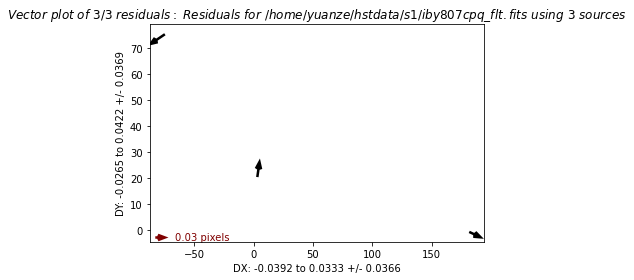

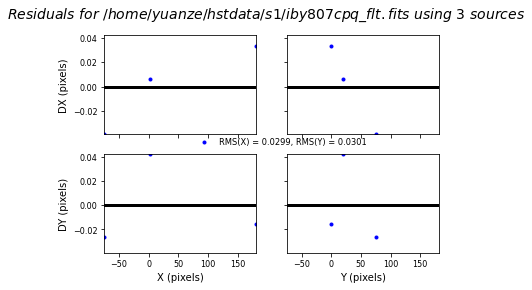

In [302]:
wcsname = 'MY'
refcat = join(datapath,'{0}.cat'.format(wcsname.lower()))
os.chdir("/home/yuanze/my_work/twfile")
tweakreg.TweakReg(inputlist,  # Pass input images
                  updatehdr=True,  # update header with new WCS solution
                  imagefindcfg={'threshold':200.,'conv_width':2.5,'dqbit':0},  # Detection parameters, threshold varies for different data
                  #refcat=refcat,  # Use user supplied catalog 
                  interactive=False,
                  see2dplot=False,
                  #expand_refcat=True,
                  shiftfile=True,  # Save out shift file (so we can look at shifts later)
                  outshifts='{0}_shifts.txt'.format(wcsname),  # name of the shift file
                  #wcsname=wcsname,  # Give our WCS a new name
                  reusename=True,
                  minobj=2,
                  searchrad=2.0,
                 fitgeometry='shift')  # Use the 6 parameter fit

Text(0.5, 1.0, 'Match: UVIS1 to SDSS(Ref)')

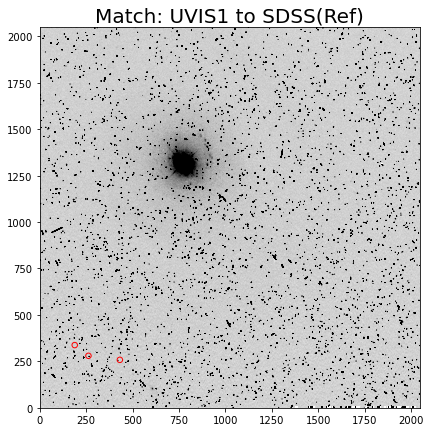

In [13]:
plt.figure(figsize = (20, 7))
data = fits.open(inputlist[2])['SCI', 1].data
zscale = ZScaleInterval()
z1, z2 = zscale.get_limits(data)
plt.imshow(data, cmap='Greys', origin='lower', vmin=z1, vmax=z2)
match_tab = ascii.read('/home/yuanze/my_work/twfile/iby807cnq_flt_catalog_fit.match')  # load match file in astropy table
x_coord, y_coord = match_tab['col11'], match_tab['col12']
plt.scatter(x_coord, y_coord, s=30, edgecolor='r', facecolor='None')

source_tab=ascii.read('/home/yuanze/my_work/twfile/iby807cnq_flt_sci1_xy_catalog.coo')
sx, sy=source_tab['col1'],source_tab['col2']
#plt.scatter(sx, sy, s=30, edgecolor='b', facecolor='None')
#plt.ylim(0, 1014)
#plt.xlim(0, 1014)
plt.title('Match: UVIS1 to SDSS(Ref)', fontsize=20)

In [301]:
shift_table = Table.read('/home/yuanze/my_work/twfile/{0}_shifts.txt'.format(wcsname), format='ascii.no_header', 
                       names=['file', 'dx', 'dy', 'rot', 'scale', 'xrms', 'yrms'])
formats = ['.2f', '.2f', '.3f', '.5f', '.2f', '.2f']
for i, col in enumerate(shift_table.colnames[1:]):
    shift_table[col].format = formats[i]
shift_table

file,dx,dy,rot,scale,xrms,yrms
str42,float64,float64,float64,float64,float64,float64
/home/yuanze/hstdata/s1/iby807cmq_flt.fits,0.00,0.00,0.000,1.00000,0.00,0.00
/home/yuanze/hstdata/s1/iby807cnq_flt.fits,0.00,0.00,0.000,1.00000,0.02,0.03
/home/yuanze/hstdata/s1/iby807coq_flt.fits,-0.00,-0.00,0.000,1.00000,0.03,0.01
/home/yuanze/hstdata/s1/iby807cpq_flt.fits,0.01,-0.01,0.000,1.00000,0.03,0.03


INFO:drizzlepac.util:Setting up logfile :  tweakreg.log


Setting up logfile :  tweakreg.log


INFO:drizzlepac.tweakreg:TweakReg Version 1.4.7(18-April-2018) started at: 13:52:54.328 (22/07/2022) 


TweakReg Version 1.4.7(18-April-2018) started at: 13:52:54.328 (22/07/2022) 


INFO:drizzlepac.tweakreg:


INFO:drizzlepac.util:Version Information


Version Information


INFO:drizzlepac.util:--------------------


--------------------


INFO:drizzlepac.util:Python Version [GCC 7.5.0]


Python Version [GCC 7.5.0]


INFO:drizzlepac.util:3.7.13 (default, Mar 29 2022, 02:18:16) 


3.7.13 (default, Mar 29 2022, 02:18:16) 


INFO:drizzlepac.util:numpy Version -> 1.21.5 


numpy Version -> 1.21.5 


INFO:drizzlepac.util:astropy Version -> 4.3.1 


astropy Version -> 4.3.1 


INFO:drizzlepac.util:stwcs Version -> 1.6.1 


stwcs Version -> 1.6.1 


INFO:drizzlepac.tweakreg:
INFO:drizzlepac.tweakreg:USER INPUT PARAMETERS common to all Processing Steps:
INFO:drizzlepac.tweakreg:	clean :	True
INFO:drizzlepac.tweakreg:	enforce_user_order :	True
INFO:drizzlepac.tweakreg:	exclusions :	
INFO:drizzlepac.tweakreg:	expand_refcat :	False
INFO:drizzlepac.tweakreg:	input :	['/home/yuanze/hstdata/s1/iby807cmq_flt.fits', '/home/yuanze/hstdata/s1/iby807cnq_flt.fits', '/home/yuanze/hstdata/s1/iby807coq_flt.fits', '/home/yuanze/hstdata/s1/iby807cpq_flt.fits', '/home/yuanze/hstdata/s1/iby807cjq_flt.fits', '/home/yuanze/hstdata/s1/iby807ckq_flt.fits', '/home/yuanze/hstdata/s1/iby807clq_flt.fits']
INFO:drizzlepac.tweakreg:	interactive :	False
INFO:drizzlepac.tweakreg:	refimage :	
INFO:drizzlepac.tweakreg:	runfile :	tweakreg.log
INFO:drizzlepac.tweakreg:	updatewcs :	False
INFO:drizzlepac.tweakreg:	verbose :	False
INFO:drizzlepac.tweakreg:	writecat :	True
INFO:drizzlepac.tweakreg:


INFO:drizzlepac.tweakreg:Finding shifts for: 


Finding shifts for: 


INFO:drizzlepac.tweakreg:    /home/yuanze/hstdata/s1/iby807cmq_flt.fits


    /home/yuanze/hstdata/s1/iby807cmq_flt.fits


INFO:drizzlepac.tweakreg:    /home/yuanze/hstdata/s1/iby807cnq_flt.fits


    /home/yuanze/hstdata/s1/iby807cnq_flt.fits


INFO:drizzlepac.tweakreg:    /home/yuanze/hstdata/s1/iby807coq_flt.fits


    /home/yuanze/hstdata/s1/iby807coq_flt.fits


INFO:drizzlepac.tweakreg:    /home/yuanze/hstdata/s1/iby807cpq_flt.fits


    /home/yuanze/hstdata/s1/iby807cpq_flt.fits


INFO:drizzlepac.tweakreg:    /home/yuanze/hstdata/s1/iby807cjq_flt.fits


    /home/yuanze/hstdata/s1/iby807cjq_flt.fits


INFO:drizzlepac.tweakreg:    /home/yuanze/hstdata/s1/iby807ckq_flt.fits


    /home/yuanze/hstdata/s1/iby807ckq_flt.fits


INFO:drizzlepac.tweakreg:    /home/yuanze/hstdata/s1/iby807clq_flt.fits


    /home/yuanze/hstdata/s1/iby807clq_flt.fits


INFO:drizzlepac.tweakreg:


INFO:drizzlepac.tweakreg:USER INPUT PARAMETERS for finding sources for each input image:
INFO:drizzlepac.tweakreg:	clean :	True
INFO:drizzlepac.tweakreg:	computesig :	True
INFO:drizzlepac.tweakreg:	conv_width :	3.0
INFO:drizzlepac.tweakreg:	dqbit :	0
INFO:drizzlepac.tweakreg:	dqbits :	
INFO:drizzlepac.tweakreg:	enforce_user_order :	True
INFO:drizzlepac.tweakreg:	expand_refcat :	False
INFO:drizzlepac.tweakreg:	fluxmax :	None
INFO:drizzlepac.tweakreg:	fluxmin :	None
INFO:drizzlepac.tweakreg:	input :	['/home/yuanze/hstdata/s1/iby807cmq_flt.fits', '/home/yuanze/hstdata/s1/iby807cnq_flt.fits', '/home/yuanze/hstdata/s1/iby807coq_flt.fits', '/home/yuanze/hstdata/s1/iby807cpq_flt.fits', '/home/yuanze/hstdata/s1/iby807cjq_flt.fits', '/home/yuanze/hstdata/s1/iby807ckq_flt.fits', '/home/yuanze/hstdata/s1/iby807clq_flt.fits']
INFO:drizzlepac.tweakreg:	interactive :	False
INFO:drizzlepac.tweakreg:	nsigma :	1.5
INFO:drizzlepac.tweakreg:	peakmax :	None
INFO:drizzlepac.tweakreg:	peakmin :	None
INFO:dr

===  Source finding for image '/home/yuanze/hstdata/s1/iby807cmq_flt.fits':


INFO:drizzlepac.catalogs:  #  Source finding for '/home/yuanze/hstdata/s1/iby807cmq_flt.fits', EXT=('SCI', 1) started at: 13:52:54.454 (22/07/2022)


  #  Source finding for '/home/yuanze/hstdata/s1/iby807cmq_flt.fits', EXT=('SCI', 1) started at: 13:52:54.454 (22/07/2022)


INFO:drizzlepac.catalogs:   Finding sources using sky sigma = 1.182600
INFO:drizzlepac.catalogs:###Source finding finished at: 13:52:54.470 (22/07/2022)
INFO:drizzlepac.catalogs:     Found 4 objects.


     Found 4 objects.


INFO:drizzlepac.imgclasses:===  FINAL number of objects in image '/home/yuanze/hstdata/s1/iby807cmq_flt.fits': 4


===  FINAL number of objects in image '/home/yuanze/hstdata/s1/iby807cmq_flt.fits': 4


INFO:drizzlepac.imgclasses:


INFO:drizzlepac.imgclasses:===  Source finding for image '/home/yuanze/hstdata/s1/iby807cnq_flt.fits':


===  Source finding for image '/home/yuanze/hstdata/s1/iby807cnq_flt.fits':


INFO:drizzlepac.catalogs:  #  Source finding for '/home/yuanze/hstdata/s1/iby807cnq_flt.fits', EXT=('SCI', 1) started at: 13:52:54.55 (22/07/2022)


  #  Source finding for '/home/yuanze/hstdata/s1/iby807cnq_flt.fits', EXT=('SCI', 1) started at: 13:52:54.55 (22/07/2022)


INFO:drizzlepac.catalogs:   Finding sources using sky sigma = 1.348211
INFO:drizzlepac.catalogs:###Source finding finished at: 13:52:54.569 (22/07/2022)
INFO:drizzlepac.catalogs:     Found 4 objects.


     Found 4 objects.


INFO:drizzlepac.imgclasses:===  FINAL number of objects in image '/home/yuanze/hstdata/s1/iby807cnq_flt.fits': 4


===  FINAL number of objects in image '/home/yuanze/hstdata/s1/iby807cnq_flt.fits': 4


INFO:drizzlepac.imgclasses:


INFO:drizzlepac.imgclasses:===  Source finding for image '/home/yuanze/hstdata/s1/iby807coq_flt.fits':


===  Source finding for image '/home/yuanze/hstdata/s1/iby807coq_flt.fits':


INFO:drizzlepac.catalogs:  #  Source finding for '/home/yuanze/hstdata/s1/iby807coq_flt.fits', EXT=('SCI', 1) started at: 13:52:54.654 (22/07/2022)


  #  Source finding for '/home/yuanze/hstdata/s1/iby807coq_flt.fits', EXT=('SCI', 1) started at: 13:52:54.654 (22/07/2022)


INFO:drizzlepac.catalogs:   Finding sources using sky sigma = 1.387190
INFO:drizzlepac.catalogs:###Source finding finished at: 13:52:54.669 (22/07/2022)
INFO:drizzlepac.catalogs:     Found 4 objects.


     Found 4 objects.


INFO:drizzlepac.imgclasses:===  FINAL number of objects in image '/home/yuanze/hstdata/s1/iby807coq_flt.fits': 4


===  FINAL number of objects in image '/home/yuanze/hstdata/s1/iby807coq_flt.fits': 4


INFO:drizzlepac.imgclasses:


INFO:drizzlepac.imgclasses:===  Source finding for image '/home/yuanze/hstdata/s1/iby807cpq_flt.fits':


===  Source finding for image '/home/yuanze/hstdata/s1/iby807cpq_flt.fits':


INFO:drizzlepac.catalogs:  #  Source finding for '/home/yuanze/hstdata/s1/iby807cpq_flt.fits', EXT=('SCI', 1) started at: 13:52:54.7 (22/07/2022)


  #  Source finding for '/home/yuanze/hstdata/s1/iby807cpq_flt.fits', EXT=('SCI', 1) started at: 13:52:54.7 (22/07/2022)


INFO:drizzlepac.catalogs:   Finding sources using sky sigma = 1.620377
INFO:drizzlepac.catalogs:###Source finding finished at: 13:52:54.767 (22/07/2022)
INFO:drizzlepac.catalogs:     Found 5 objects.


     Found 5 objects.


INFO:drizzlepac.imgclasses:===  FINAL number of objects in image '/home/yuanze/hstdata/s1/iby807cpq_flt.fits': 5


===  FINAL number of objects in image '/home/yuanze/hstdata/s1/iby807cpq_flt.fits': 5


INFO:drizzlepac.imgclasses:


INFO:drizzlepac.imgclasses:===  Source finding for image '/home/yuanze/hstdata/s1/iby807cjq_flt.fits':


===  Source finding for image '/home/yuanze/hstdata/s1/iby807cjq_flt.fits':


INFO:drizzlepac.catalogs:  #  Source finding for '/home/yuanze/hstdata/s1/iby807cjq_flt.fits', EXT=('SCI', 1) started at: 13:52:54.87 (22/07/2022)


  #  Source finding for '/home/yuanze/hstdata/s1/iby807cjq_flt.fits', EXT=('SCI', 1) started at: 13:52:54.87 (22/07/2022)


INFO:drizzlepac.catalogs:   Finding sources using sky sigma = 2.871821
INFO:drizzlepac.catalogs:###Source finding finished at: 13:52:54.945 (22/07/2022)
INFO:drizzlepac.catalogs:     Found 364 objects.


     Found 364 objects.


INFO:drizzlepac.imgclasses:===  FINAL number of objects in image '/home/yuanze/hstdata/s1/iby807cjq_flt.fits': 364


===  FINAL number of objects in image '/home/yuanze/hstdata/s1/iby807cjq_flt.fits': 364


INFO:drizzlepac.imgclasses:


INFO:drizzlepac.imgclasses:===  Source finding for image '/home/yuanze/hstdata/s1/iby807ckq_flt.fits':


===  Source finding for image '/home/yuanze/hstdata/s1/iby807ckq_flt.fits':


INFO:drizzlepac.catalogs:  #  Source finding for '/home/yuanze/hstdata/s1/iby807ckq_flt.fits', EXT=('SCI', 1) started at: 13:52:55.059 (22/07/2022)


  #  Source finding for '/home/yuanze/hstdata/s1/iby807ckq_flt.fits', EXT=('SCI', 1) started at: 13:52:55.059 (22/07/2022)


INFO:drizzlepac.catalogs:   Finding sources using sky sigma = 2.873695
INFO:drizzlepac.catalogs:###Source finding finished at: 13:52:55.121 (22/07/2022)
INFO:drizzlepac.catalogs:     Found 288 objects.


     Found 288 objects.


INFO:drizzlepac.imgclasses:===  FINAL number of objects in image '/home/yuanze/hstdata/s1/iby807ckq_flt.fits': 288


===  FINAL number of objects in image '/home/yuanze/hstdata/s1/iby807ckq_flt.fits': 288


INFO:drizzlepac.imgclasses:


INFO:drizzlepac.imgclasses:===  Source finding for image '/home/yuanze/hstdata/s1/iby807clq_flt.fits':


===  Source finding for image '/home/yuanze/hstdata/s1/iby807clq_flt.fits':


INFO:drizzlepac.catalogs:  #  Source finding for '/home/yuanze/hstdata/s1/iby807clq_flt.fits', EXT=('SCI', 1) started at: 13:52:55.236 (22/07/2022)


  #  Source finding for '/home/yuanze/hstdata/s1/iby807clq_flt.fits', EXT=('SCI', 1) started at: 13:52:55.236 (22/07/2022)


INFO:drizzlepac.catalogs:   Finding sources using sky sigma = 2.878746
INFO:drizzlepac.catalogs:###Source finding finished at: 13:52:55.305 (22/07/2022)
INFO:drizzlepac.catalogs:     Found 347 objects.


     Found 347 objects.


INFO:drizzlepac.imgclasses:===  FINAL number of objects in image '/home/yuanze/hstdata/s1/iby807clq_flt.fits': 347


===  FINAL number of objects in image '/home/yuanze/hstdata/s1/iby807clq_flt.fits': 347


INFO:drizzlepac.imgclasses:


INFO:drizzlepac.imgclasses:Converting RA/Dec positions of reference sources from "/home/yuanze/hstdata/s1/iby807cmq_flt.fits" to X,Y positions in reference WCS...
INFO:drizzlepac.tweakreg:


INFO:drizzlepac.tweakreg:===============================================================


INFO:drizzlepac.tweakreg:Performing alignment in the projection plane defined by the WCS


Performing alignment in the projection plane defined by the WCS


INFO:drizzlepac.tweakreg:derived from '/home/yuanze/hstdata/s1/iby807cmq_flt.fits'


derived from '/home/yuanze/hstdata/s1/iby807cmq_flt.fits'


INFO:drizzlepac.tweakreg:===============================================================


INFO:drizzlepac.tweakreg:


INFO:drizzlepac.tweakreg:USER INPUT PARAMETERS for matching sources:
INFO:drizzlepac.tweakreg:	minobj :	2
INFO:drizzlepac.tweakreg:	residplot :	both
INFO:drizzlepac.tweakreg:	searchrad :	1.0
INFO:drizzlepac.tweakreg:	searchunits :	arcseconds
INFO:drizzlepac.tweakreg:	see2dplot :	True
INFO:drizzlepac.tweakreg:	separation :	0.5
INFO:drizzlepac.tweakreg:	tolerance :	1.0
INFO:drizzlepac.tweakreg:	use2dhist :	True
INFO:drizzlepac.tweakreg:	xoffset :	0.0
INFO:drizzlepac.tweakreg:	yoffset :	0.0
INFO:drizzlepac.tweakreg:
INFO:drizzlepac.tweakreg:USER INPUT PARAMETERS for fitting source lists:
INFO:drizzlepac.tweakreg:	fitgeometry :	shift
INFO:drizzlepac.tweakreg:	labelsize :	8
INFO:drizzlepac.tweakreg:	minobj :	2
INFO:drizzlepac.tweakreg:	nclip :	3
INFO:drizzlepac.tweakreg:	residplot :	both
INFO:drizzlepac.tweakreg:	sigma :	3.0
INFO:drizzlepac.tweakreg:	ylimit :	None
INFO:drizzlepac.tweakreg:
INFO:drizzlepac.tweakreg:USER INPUT PARAMETERS for creating a shiftfile:
INFO:drizzlepac.tweakreg:	out

INFO:drizzlepac.tweakreg:====================


INFO:drizzlepac.tweakreg:Performing fit for: /home/yuanze/hstdata/s1/iby807cnq_flt.fits


Performing fit for: /home/yuanze/hstdata/s1/iby807cnq_flt.fits


INFO:drizzlepac.tweakreg:


INFO:drizzlepac.imgclasses:Matching sources from '/home/yuanze/hstdata/s1/iby807cnq_flt.fits' with sources from reference image '/home/yuanze/hstdata/s1/iby807cmq_flt.fits'


Matching sources from '/home/yuanze/hstdata/s1/iby807cnq_flt.fits' with sources from reference image '/home/yuanze/hstdata/s1/iby807cmq_flt.fits'


INFO:drizzlepac.imgclasses:Computing initial guess for X and Y shifts...


Computing initial guess for X and Y shifts...


INFO:drizzlepac.imgclasses:Found initial X and Y shifts of 0.2027, 0.2027 based on a single non-zero bin and 3 matches


Found initial X and Y shifts of 0.2027, 0.2027 based on a single non-zero bin and 3 matches


INFO:drizzlepac.imgclasses:Found 3 matches for /home/yuanze/hstdata/s1/iby807cnq_flt.fits...


Found 3 matches for /home/yuanze/hstdata/s1/iby807cnq_flt.fits...


INFO:drizzlepac.linearfit:Performing "shift" fit
INFO:drizzlepac.linearfit:Performing "shift" fit
INFO:drizzlepac.linearfit:Performing "shift" fit
INFO:drizzlepac.linearfit:Performing "shift" fit
INFO:drizzlepac.imgclasses:Computed  shift  fit for  /home/yuanze/hstdata/s1/iby807cnq_flt.fits : 


Computed  shift  fit for  /home/yuanze/hstdata/s1/iby807cnq_flt.fits : 


INFO:drizzlepac.imgclasses:XSH: -0.0082  YSH: -0.0005


XSH: -0.0082  YSH: -0.0005


INFO:drizzlepac.imgclasses:FIT XRMS: 0.023      FIT YRMS: 0.033  


FIT XRMS: 0.023      FIT YRMS: 0.033  


INFO:drizzlepac.imgclasses:FIT RMSE: 0.04       FIT MAE: 0.036  


FIT RMSE: 0.04       FIT MAE: 0.036  


INFO:drizzlepac.imgclasses:


INFO:drizzlepac.imgclasses:RMS_RA: 1.5e-06 (deg)   RMS_DEC: 5.6e-08 (deg)


RMS_RA: 1.5e-06 (deg)   RMS_DEC: 5.6e-08 (deg)


INFO:drizzlepac.imgclasses:


INFO:drizzlepac.imgclasses:Final solution based on  3  objects.


Final solution based on  3  objects.


INFO:drizzlepac.imgclasses:Creating catalog for the fit: iby807cnq_flt_catalog_fit.match
INFO:drizzlepac.tweakutils:wrote XY data to:  iby807cnq_flt_catalog_fit.match


wrote XY data to:  iby807cnq_flt_catalog_fit.match


INFO:drizzlepac.tweakutils:Total # points: 3


Total # points: 3


INFO:drizzlepac.tweakutils:# of points after clipping: 3


# of points after clipping: 3


INFO:drizzlepac.tweakutils:Total # points: 3


Total # points: 3


INFO:drizzlepac.tweakutils:# of points after clipping: 3


# of points after clipping: 3


INFO:drizzlepac.updatehdr:....Updating header for '/home/yuanze/hstdata/s1/iby807cnq_flt.fits' ...
INFO:drizzlepac.updatehdr:Processing /home/yuanze/hstdata/s1/iby807cnq_flt.fits['SCI',1]
INFO:drizzlepac.updatehdr:Updating header for /home/yuanze/hstdata/s1/iby807cnq_flt.fits[1]
INFO:drizzlepac.imgclasses:Deleting intermediate match file: iby807cnq_flt_xy_catalog.match
INFO:drizzlepac.imgclasses:Deleting intermediate match file: iby807cnq_flt_catalog_fit.match
INFO:drizzlepac.tweakreg:


INFO:drizzlepac.tweakreg:====================


INFO:drizzlepac.tweakreg:Performing fit for: /home/yuanze/hstdata/s1/iby807coq_flt.fits


Performing fit for: /home/yuanze/hstdata/s1/iby807coq_flt.fits


INFO:drizzlepac.tweakreg:


INFO:drizzlepac.imgclasses:Matching sources from '/home/yuanze/hstdata/s1/iby807coq_flt.fits' with sources from reference image '/home/yuanze/hstdata/s1/iby807cmq_flt.fits'


Matching sources from '/home/yuanze/hstdata/s1/iby807coq_flt.fits' with sources from reference image '/home/yuanze/hstdata/s1/iby807cmq_flt.fits'


INFO:drizzlepac.imgclasses:Computing initial guess for X and Y shifts...


Computing initial guess for X and Y shifts...


INFO:drizzlepac.imgclasses:Found initial X and Y shifts of 0.2027, 0.2027 based on a single non-zero bin and 3 matches


Found initial X and Y shifts of 0.2027, 0.2027 based on a single non-zero bin and 3 matches


INFO:drizzlepac.imgclasses:Found 3 matches for /home/yuanze/hstdata/s1/iby807coq_flt.fits...


Found 3 matches for /home/yuanze/hstdata/s1/iby807coq_flt.fits...


INFO:drizzlepac.linearfit:Performing "shift" fit
INFO:drizzlepac.linearfit:Performing "shift" fit
INFO:drizzlepac.linearfit:Performing "shift" fit
INFO:drizzlepac.linearfit:Performing "shift" fit
INFO:drizzlepac.imgclasses:Computed  shift  fit for  /home/yuanze/hstdata/s1/iby807coq_flt.fits : 


Computed  shift  fit for  /home/yuanze/hstdata/s1/iby807coq_flt.fits : 


INFO:drizzlepac.imgclasses:XSH: -0.0087  YSH: 0.0001


XSH: -0.0087  YSH: 0.0001


INFO:drizzlepac.imgclasses:FIT XRMS: 0.039      FIT YRMS: 0.0056 


FIT XRMS: 0.039      FIT YRMS: 0.0056 


INFO:drizzlepac.imgclasses:FIT RMSE: 0.039      FIT MAE: 0.035  


FIT RMSE: 0.039      FIT MAE: 0.035  


INFO:drizzlepac.imgclasses:


INFO:drizzlepac.imgclasses:RMS_RA: 1e-06 (deg)   RMS_DEC: 9.8e-07 (deg)


RMS_RA: 1e-06 (deg)   RMS_DEC: 9.8e-07 (deg)


INFO:drizzlepac.imgclasses:


INFO:drizzlepac.imgclasses:Final solution based on  3  objects.


Final solution based on  3  objects.


INFO:drizzlepac.imgclasses:Creating catalog for the fit: iby807coq_flt_catalog_fit.match
INFO:drizzlepac.tweakutils:wrote XY data to:  iby807coq_flt_catalog_fit.match


wrote XY data to:  iby807coq_flt_catalog_fit.match


INFO:drizzlepac.tweakutils:Total # points: 3


Total # points: 3


INFO:drizzlepac.tweakutils:# of points after clipping: 3


# of points after clipping: 3


INFO:drizzlepac.tweakutils:Total # points: 3


Total # points: 3


INFO:drizzlepac.tweakutils:# of points after clipping: 3


# of points after clipping: 3


INFO:drizzlepac.updatehdr:....Updating header for '/home/yuanze/hstdata/s1/iby807coq_flt.fits' ...
INFO:drizzlepac.updatehdr:Processing /home/yuanze/hstdata/s1/iby807coq_flt.fits['SCI',1]
INFO:drizzlepac.updatehdr:Updating header for /home/yuanze/hstdata/s1/iby807coq_flt.fits[1]
INFO:drizzlepac.imgclasses:Deleting intermediate match file: iby807coq_flt_xy_catalog.match
INFO:drizzlepac.imgclasses:Deleting intermediate match file: iby807coq_flt_catalog_fit.match
INFO:drizzlepac.tweakreg:


INFO:drizzlepac.tweakreg:====================


INFO:drizzlepac.tweakreg:Performing fit for: /home/yuanze/hstdata/s1/iby807cpq_flt.fits


Performing fit for: /home/yuanze/hstdata/s1/iby807cpq_flt.fits


INFO:drizzlepac.tweakreg:


INFO:drizzlepac.imgclasses:Matching sources from '/home/yuanze/hstdata/s1/iby807cpq_flt.fits' with sources from reference image '/home/yuanze/hstdata/s1/iby807cmq_flt.fits'


Matching sources from '/home/yuanze/hstdata/s1/iby807cpq_flt.fits' with sources from reference image '/home/yuanze/hstdata/s1/iby807cmq_flt.fits'


INFO:drizzlepac.imgclasses:Computing initial guess for X and Y shifts...


Computing initial guess for X and Y shifts...


INFO:drizzlepac.imgclasses:Found initial X and Y shifts of 0.2027, 0.2027 based on a single non-zero bin and 4 matches


Found initial X and Y shifts of 0.2027, 0.2027 based on a single non-zero bin and 4 matches


INFO:drizzlepac.imgclasses:Found 4 matches for /home/yuanze/hstdata/s1/iby807cpq_flt.fits...


Found 4 matches for /home/yuanze/hstdata/s1/iby807cpq_flt.fits...


INFO:drizzlepac.linearfit:Performing "shift" fit
INFO:drizzlepac.linearfit:Performing "shift" fit
INFO:drizzlepac.linearfit:Performing "shift" fit
INFO:drizzlepac.linearfit:Performing "shift" fit
INFO:drizzlepac.imgclasses:Computed  shift  fit for  /home/yuanze/hstdata/s1/iby807cpq_flt.fits : 


Computed  shift  fit for  /home/yuanze/hstdata/s1/iby807cpq_flt.fits : 


INFO:drizzlepac.imgclasses:XSH: -0.0012  YSH: 0.0020


XSH: -0.0012  YSH: 0.0020


INFO:drizzlepac.imgclasses:FIT XRMS: 0.035      FIT YRMS: 0.026  


FIT XRMS: 0.035      FIT YRMS: 0.026  


INFO:drizzlepac.imgclasses:FIT RMSE: 0.043      FIT MAE: 0.043  


FIT RMSE: 0.043      FIT MAE: 0.043  


INFO:drizzlepac.imgclasses:


INFO:drizzlepac.imgclasses:RMS_RA: 1.5e-06 (deg)   RMS_DEC: 4.4e-07 (deg)


RMS_RA: 1.5e-06 (deg)   RMS_DEC: 4.4e-07 (deg)


INFO:drizzlepac.imgclasses:


INFO:drizzlepac.imgclasses:Final solution based on  4  objects.


Final solution based on  4  objects.


INFO:drizzlepac.imgclasses:Creating catalog for the fit: iby807cpq_flt_catalog_fit.match
INFO:drizzlepac.tweakutils:wrote XY data to:  iby807cpq_flt_catalog_fit.match


wrote XY data to:  iby807cpq_flt_catalog_fit.match


INFO:drizzlepac.tweakutils:Total # points: 4


Total # points: 4


INFO:drizzlepac.tweakutils:# of points after clipping: 4


# of points after clipping: 4


INFO:drizzlepac.tweakutils:Total # points: 4


Total # points: 4


INFO:drizzlepac.tweakutils:# of points after clipping: 4


# of points after clipping: 4


INFO:drizzlepac.updatehdr:....Updating header for '/home/yuanze/hstdata/s1/iby807cpq_flt.fits' ...
INFO:drizzlepac.updatehdr:Processing /home/yuanze/hstdata/s1/iby807cpq_flt.fits['SCI',1]
INFO:drizzlepac.updatehdr:Updating header for /home/yuanze/hstdata/s1/iby807cpq_flt.fits[1]
INFO:drizzlepac.imgclasses:Deleting intermediate match file: iby807cpq_flt_xy_catalog.match
INFO:drizzlepac.imgclasses:Deleting intermediate match file: iby807cpq_flt_catalog_fit.match
INFO:drizzlepac.tweakreg:


INFO:drizzlepac.tweakreg:====================


INFO:drizzlepac.tweakreg:Performing fit for: /home/yuanze/hstdata/s1/iby807cjq_flt.fits


Performing fit for: /home/yuanze/hstdata/s1/iby807cjq_flt.fits


INFO:drizzlepac.tweakreg:


INFO:drizzlepac.imgclasses:Matching sources from '/home/yuanze/hstdata/s1/iby807cjq_flt.fits' with sources from reference image '/home/yuanze/hstdata/s1/iby807cmq_flt.fits'


Matching sources from '/home/yuanze/hstdata/s1/iby807cjq_flt.fits' with sources from reference image '/home/yuanze/hstdata/s1/iby807cmq_flt.fits'


INFO:drizzlepac.imgclasses:Computing initial guess for X and Y shifts...


Computing initial guess for X and Y shifts...


INFO:drizzlepac.imgclasses:Found initial X and Y shifts of -3.797, 6.203 based on a single non-zero bin and 1 matches


Found initial X and Y shifts of -3.797, 6.203 based on a single non-zero bin and 1 matches


INFO:drizzlepac.imgclasses:##############################################################################


##############################################################################


INFO:drizzlepac.imgclasses:#                                                                            #


#                                                                            #


INFO:drizzlepac.imgclasses:# WARNING:                                                                   #


# WARNING:                                                                   #


INFO:drizzlepac.imgclasses:# Not enough matches (< 2) found for input image:                            #


# Not enough matches (< 2) found for input image:                            #


INFO:drizzlepac.imgclasses:# /home/yuanze/hstdata/s1/iby807cjq_flt.fits                                 #


# /home/yuanze/hstdata/s1/iby807cjq_flt.fits                                 #


INFO:drizzlepac.imgclasses:#                                                                            #


#                                                                            #


INFO:drizzlepac.imgclasses:##############################################################################


##############################################################################


INFO:drizzlepac.tweakreg:


INFO:drizzlepac.tweakreg:====================


INFO:drizzlepac.tweakreg:Performing fit for: /home/yuanze/hstdata/s1/iby807ckq_flt.fits


Performing fit for: /home/yuanze/hstdata/s1/iby807ckq_flt.fits


INFO:drizzlepac.tweakreg:


INFO:drizzlepac.imgclasses:Matching sources from '/home/yuanze/hstdata/s1/iby807ckq_flt.fits' with sources from reference image '/home/yuanze/hstdata/s1/iby807cmq_flt.fits'


Matching sources from '/home/yuanze/hstdata/s1/iby807ckq_flt.fits' with sources from reference image '/home/yuanze/hstdata/s1/iby807cmq_flt.fits'


INFO:drizzlepac.imgclasses:Computing initial guess for X and Y shifts...


Computing initial guess for X and Y shifts...


INFO:drizzlepac.imgclasses:WARNING: No matches found within a search radius of 7.79727 pixels.


INFO:drizzlepac.imgclasses:##############################################################################


##############################################################################


INFO:drizzlepac.imgclasses:#                                                                            #


#                                                                            #


INFO:drizzlepac.imgclasses:# WARNING:                                                                   #


# WARNING:                                                                   #


INFO:drizzlepac.imgclasses:# Not enough matches (< 2) found for input image:                            #


# Not enough matches (< 2) found for input image:                            #


INFO:drizzlepac.imgclasses:# /home/yuanze/hstdata/s1/iby807ckq_flt.fits                                 #


# /home/yuanze/hstdata/s1/iby807ckq_flt.fits                                 #


INFO:drizzlepac.imgclasses:#                                                                            #


#                                                                            #


INFO:drizzlepac.imgclasses:##############################################################################


##############################################################################


INFO:drizzlepac.tweakreg:


INFO:drizzlepac.tweakreg:====================


INFO:drizzlepac.tweakreg:Performing fit for: /home/yuanze/hstdata/s1/iby807clq_flt.fits


Performing fit for: /home/yuanze/hstdata/s1/iby807clq_flt.fits


INFO:drizzlepac.tweakreg:


INFO:drizzlepac.imgclasses:Matching sources from '/home/yuanze/hstdata/s1/iby807clq_flt.fits' with sources from reference image '/home/yuanze/hstdata/s1/iby807cmq_flt.fits'


Matching sources from '/home/yuanze/hstdata/s1/iby807clq_flt.fits' with sources from reference image '/home/yuanze/hstdata/s1/iby807cmq_flt.fits'


INFO:drizzlepac.imgclasses:Computing initial guess for X and Y shifts...


Computing initial guess for X and Y shifts...


INFO:drizzlepac.imgclasses:Found initial X and Y shifts of 7.203, -4.797 with significance of 0 and 1 matches


Found initial X and Y shifts of 7.203, -4.797 with significance of 0 and 1 matches


INFO:drizzlepac.imgclasses:##############################################################################


##############################################################################


INFO:drizzlepac.imgclasses:#                                                                            #


#                                                                            #


INFO:drizzlepac.imgclasses:# WARNING:                                                                   #


# WARNING:                                                                   #


INFO:drizzlepac.imgclasses:# Not enough matches (< 2) found for input image:                            #


# Not enough matches (< 2) found for input image:                            #


INFO:drizzlepac.imgclasses:# /home/yuanze/hstdata/s1/iby807clq_flt.fits                                 #


# /home/yuanze/hstdata/s1/iby807clq_flt.fits                                 #


INFO:drizzlepac.imgclasses:#                                                                            #


#                                                                            #


INFO:drizzlepac.imgclasses:##############################################################################


##############################################################################


INFO:drizzlepac.tweakreg:


INFO:drizzlepac.tweakreg:Unable to match the following images:


Unable to match the following images:


INFO:drizzlepac.tweakreg:-------------------------------------


-------------------------------------


INFO:drizzlepac.tweakreg:/home/yuanze/hstdata/s1/iby807cjq_flt.fits


/home/yuanze/hstdata/s1/iby807cjq_flt.fits


INFO:drizzlepac.tweakreg:/home/yuanze/hstdata/s1/iby807ckq_flt.fits


/home/yuanze/hstdata/s1/iby807ckq_flt.fits


INFO:drizzlepac.tweakreg:/home/yuanze/hstdata/s1/iby807clq_flt.fits


/home/yuanze/hstdata/s1/iby807clq_flt.fits


INFO:drizzlepac.tweakreg:


INFO:drizzlepac.tweakutils:Writing out shiftfile : shiftWFC3_UVIS_flc_test1.txt


Writing out shiftfile : shiftWFC3_UVIS_flc_test1.txt


INFO:drizzlepac.util:Trailer file written to:  tweakreg.log


Trailer file written to:  tweakreg.log


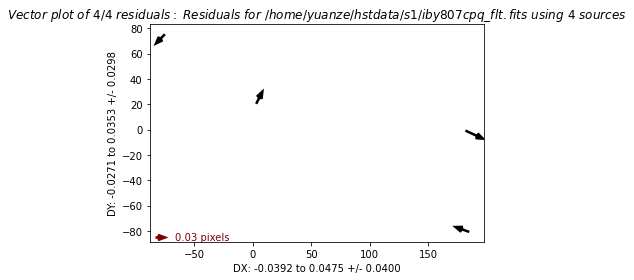

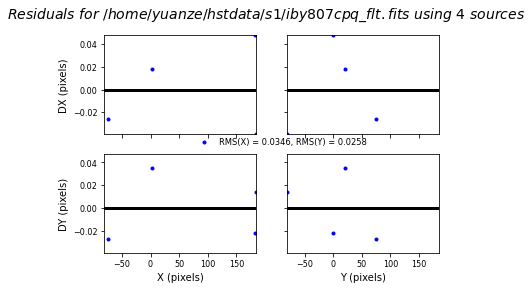

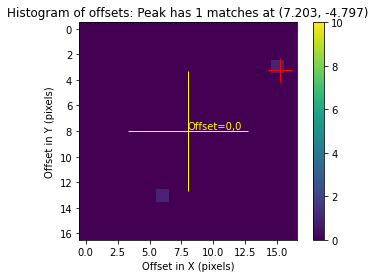

In [162]:
#TweakReg test to find the most appropriate input parameters. Run this First!
tweakreg.TweakReg(inputlist,
                  imagefindcfg={'threshold': 100,'conv_width': 3.0,'dqbit':0},
                  shiftfile=True, outshifts='shift{0}_flc_test1.txt'.format(telescope),
                  updatehdr=False,minobj=2,clean=True,reusename=True, interactive=False,fitgeometry='shift')

In [ ]:
tweakreg.TweakReg(inputlist,
                  imagefindcfg={'threshold': 100,'conv_width': conv[telescope]},
                  updatehdr=True,minobj=3,reusename=True,clean=True, interactive=False)

In [82]:
residual_pngs = glob.glob("residual*png")
for png in residual_pngs: 
    path = os.path.abspath(join(os.curdir, png))
    new_path = os.path.abspath(join(os.curdir, 'test1_{}'.format(png)))
    os.rename(path, new_path)

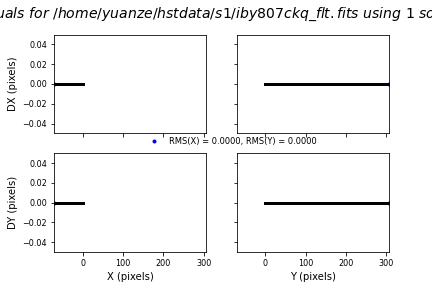

In [131]:
residual_pngs = glob.glob("residual*png")

Image(filename=residual_pngs[2])

In [79]:
shift_table = Table.read('shift{0}_flc_test1.txt'.format(telescope), format='ascii.no_header', 
                       names=['file', 'dx', 'dy', 'rot', 'scale', 'xrms', 'yrms'])
formats = ['.2f', '.2f', '.3f', '.5f', '.2f', '.2f']
for i, col in enumerate(shift_table.colnames[1:]):
    shift_table[col].format = formats[i]
shift_table

file,dx,dy,rot,scale,xrms,yrms
str42,float64,float64,float64,float64,float64,float64
/home/yuanze/hstdata/s1/iby807cjq_flt.fits,0.00,0.00,0.000,1.00000,0.00,0.00
/home/yuanze/hstdata/s1/iby807ckq_flt.fits,0.29,-3.55,0.001,0.99995,0.00,0.02
/home/yuanze/hstdata/s1/iby807clq_flt.fits,1.01,-8.84,359.993,0.99986,0.01,0.02
